In [52]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install scipy

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import sklearn 
from sklearn.model_selection import train_test_split,GridSearchCV, KFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, LinearRegression, Ridge

In [58]:

import scipy.stats as stats

In [59]:
df = pd.read_csv("C:\\Users\\ramri\\Downloads\\UKHPI.csv")

In [60]:
df.head()

Date     RegionName   AreaCode  AveragePrice      Index  IndexSA  \
0  01/01/2004  Aberdeenshire  S12000034   81693.66964  40.864214      NaN   
1  01/02/2004  Aberdeenshire  S12000034   81678.76231  40.856757      NaN   
2  01/03/2004  Aberdeenshire  S12000034   83525.09702  41.780317      NaN   
3  01/04/2004  Aberdeenshire  S12000034   84333.67900  42.184780      NaN   
4  01/05/2004  Aberdeenshire  S12000034   86379.95396  43.208353      NaN   

   1m%Change  12m%Change  AveragePriceSA  SalesVolume  ...     NewPrice  \
0        NaN         NaN             NaN        388.0  ...  88436.13953   
1  -0.018248         NaN             NaN        326.0  ...  88606.44649   
2   2.260483         NaN             NaN        453.0  ...  90296.91375   
3   0.968071         NaN             NaN        571.0  ...  90319.87844   
4   2.426403         NaN             NaN        502.0  ...  91989.17763   

    NewIndex  New1m%Change  New12m%Change  NewSalesVolume     OldPrice  \
0  40.267250           NaN            NaN           103.0  81043.95084   
1  40.344795      0.192576            NaN           107.0  80965.29542   
2  41.114508      1.907838            NaN           140.0  82903.23948   
3  41.124964      0.025432            NaN           180.0  84003.99161   
4  41.885039      1.848208            NaN           167.0  86222.73484   

    OldIndex  Old1m%Change  Old12m%Change  OldSalesVolume  
0  40.883367           NaN            NaN           285.0  
1  40.843688     -0.097053            NaN           219.0  
2  41.821302      2.393549            NaN           313.0  
3  42.376586      1.327755            NaN           391.0  
4  43.495852      2.641235            NaN           335.0  

[5 rows x 54 columns]

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139881 entries, 0 to 139880
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    139881 non-null  object 
 1   RegionName              139881 non-null  object 
 2   AreaCode                139881 non-null  object 
 3   AveragePrice            139881 non-null  float64
 4   Index                   139881 non-null  float64
 5   IndexSA                 4704 non-null    float64
 6   1m%Change               139438 non-null  float64
 7   12m%Change              134841 non-null  float64
 8   AveragePriceSA          4704 non-null    float64
 9   SalesVolume             135382 non-null  float64
 10  DetachedPrice           133500 non-null  float64
 11  DetachedIndex           133500 non-null  float64
 12  Detached1m%Change       133091 non-null  float64
 13  Detached12m%Change      128616 non-null  float64
 14  SemiDetachedPrice   

In [62]:
df.shape

(139881, 54)

In [63]:
df.isna().sum()

Date                           0
RegionName                     0
AreaCode                       0
AveragePrice                   0
Index                          0
IndexSA                   135177
1m%Change                    443
12m%Change                  5040
AveragePriceSA            135177
SalesVolume                 4499
DetachedPrice               6381
DetachedIndex               6381
Detached1m%Change           6790
Detached12m%Change         11265
SemiDetachedPrice           6369
SemiDetachedIndex           6369
SemiDetached1m%Change       6778
SemiDetached12m%Change     11253
TerracedPrice               6342
TerracedIndex               6342
Terraced1m%Change           6751
Terraced12m%Change         11226
FlatPrice                   6033
FlatIndex                   6033
Flat1m%Change               6443
Flat12m%Change             10929
CashPrice                  86025
CashIndex                  86025
Cash1m%Change              86431
Cash12m%Change             90897
CashSalesV

In [64]:
# DATA CLEANING

In [65]:
df = df.drop(['AreaCode'], axis = 1)

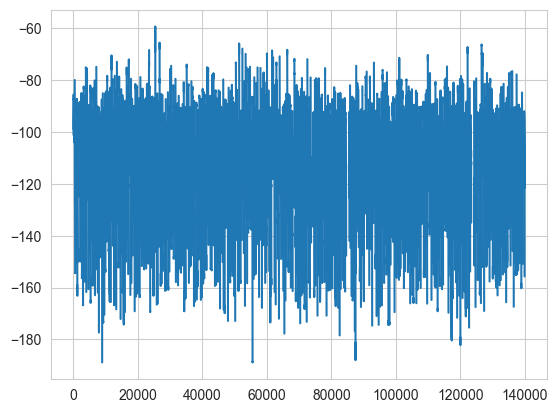

In [66]:
plt.plot(df.FOOIndex - df.MortgageIndex-df.CashIndex)

In [67]:
# DEALING WITH NULLS
for i in df[df.columns[df.isnull().any()]].columns:
    print('-', i)

- IndexSA
- 1m%Change
- 12m%Change
- AveragePriceSA
- SalesVolume
- DetachedPrice
- DetachedIndex
- Detached1m%Change
- Detached12m%Change
- SemiDetachedPrice
- SemiDetachedIndex
- SemiDetached1m%Change
- SemiDetached12m%Change
- TerracedPrice
- TerracedIndex
- Terraced1m%Change
- Terraced12m%Change
- FlatPrice
- FlatIndex
- Flat1m%Change
- Flat12m%Change
- CashPrice
- CashIndex
- Cash1m%Change
- Cash12m%Change
- CashSalesVolume
- MortgagePrice
- MortgageIndex
- Mortgage1m%Change
- Mortgage12m%Change
- MortgageSalesVolume
- FTBPrice
- FTBIndex
- FTB1m%Change
- FTB12m%Change
- FOOPrice
- FOOIndex
- FOO1m%Change
- FOO12m%Change
- NewPrice
- NewIndex
- New1m%Change
- New12m%Change
- NewSalesVolume
- OldPrice
- OldIndex
- Old1m%Change
- Old12m%Change
- OldSalesVolume


In [68]:
df.SalesVolume.fillna('NA', inplace = True)
df.DetachedPrice.fillna('NA', inplace = True)
df.DetachedIndex.fillna('NA', inplace = True)
df.SemiDetachedPrice.fillna('NA', inplace = True)
df.SemiDetachedIndex.fillna('NA', inplace = True)
df.TerracedPrice.fillna('NA', inplace = True)
df.TerracedIndex.fillna('NA', inplace = True)
df.FlatPrice.fillna('NA', inplace = True)
df.FlatIndex.fillna('NA', inplace = True)
df.CashPrice.fillna('NA', inplace = True)
df.CashIndex.fillna('NA', inplace = True)
df.CashSalesVolume.fillna('NA', inplace = True)
df.MortgagePrice.fillna('NA', inplace = True)
df.MortgageIndex.fillna('NA', inplace = True)
df.MortgageSalesVolume.fillna('NA', inplace = True)
df.FTBPrice.fillna('NA', inplace = True)
df.FTBIndex.fillna('NA', inplace = True)
df.FOOPrice.fillna('NA', inplace = True)
df.FOOIndex.fillna('NA', inplace = True)
df.NewPrice.fillna('NA', inplace = True)
df.NewIndex.fillna('NA', inplace = True)
df.NewSalesVolume.fillna('NA', inplace = True)
df.OldPrice.fillna('NA', inplace = True)
df.OldIndex.fillna('NA', inplace = True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139881 entries, 0 to 139880
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    139881 non-null  object 
 1   RegionName              139881 non-null  object 
 2   AveragePrice            139881 non-null  float64
 3   Index                   139881 non-null  float64
 4   IndexSA                 4704 non-null    float64
 5   1m%Change               139438 non-null  float64
 6   12m%Change              134841 non-null  float64
 7   AveragePriceSA          4704 non-null    float64
 8   SalesVolume             139881 non-null  object 
 9   DetachedPrice           139881 non-null  object 
 10  DetachedIndex           139881 non-null  object 
 11  Detached1m%Change       133091 non-null  float64
 12  Detached12m%Change      128616 non-null  float64
 13  SemiDetachedPrice       139881 non-null  object 
 14  SemiDetachedIndex   

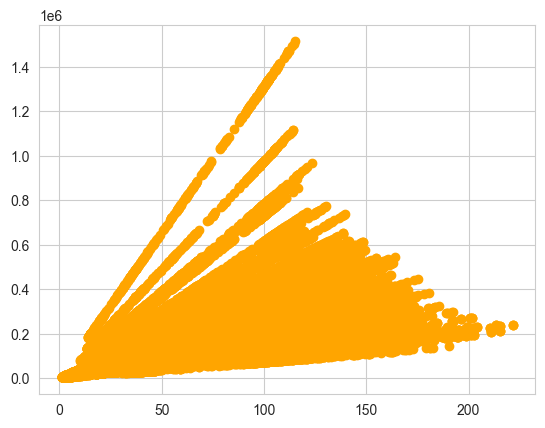

In [70]:
plt.scatter(df.Index, df.AveragePrice, color = "orange")

In [71]:
df[['Index','AveragePrice']].corr()

Index  AveragePrice
Index         1.000000      0.548027
AveragePrice  0.548027      1.000000

In [72]:
#OUTLIER REMOVAL

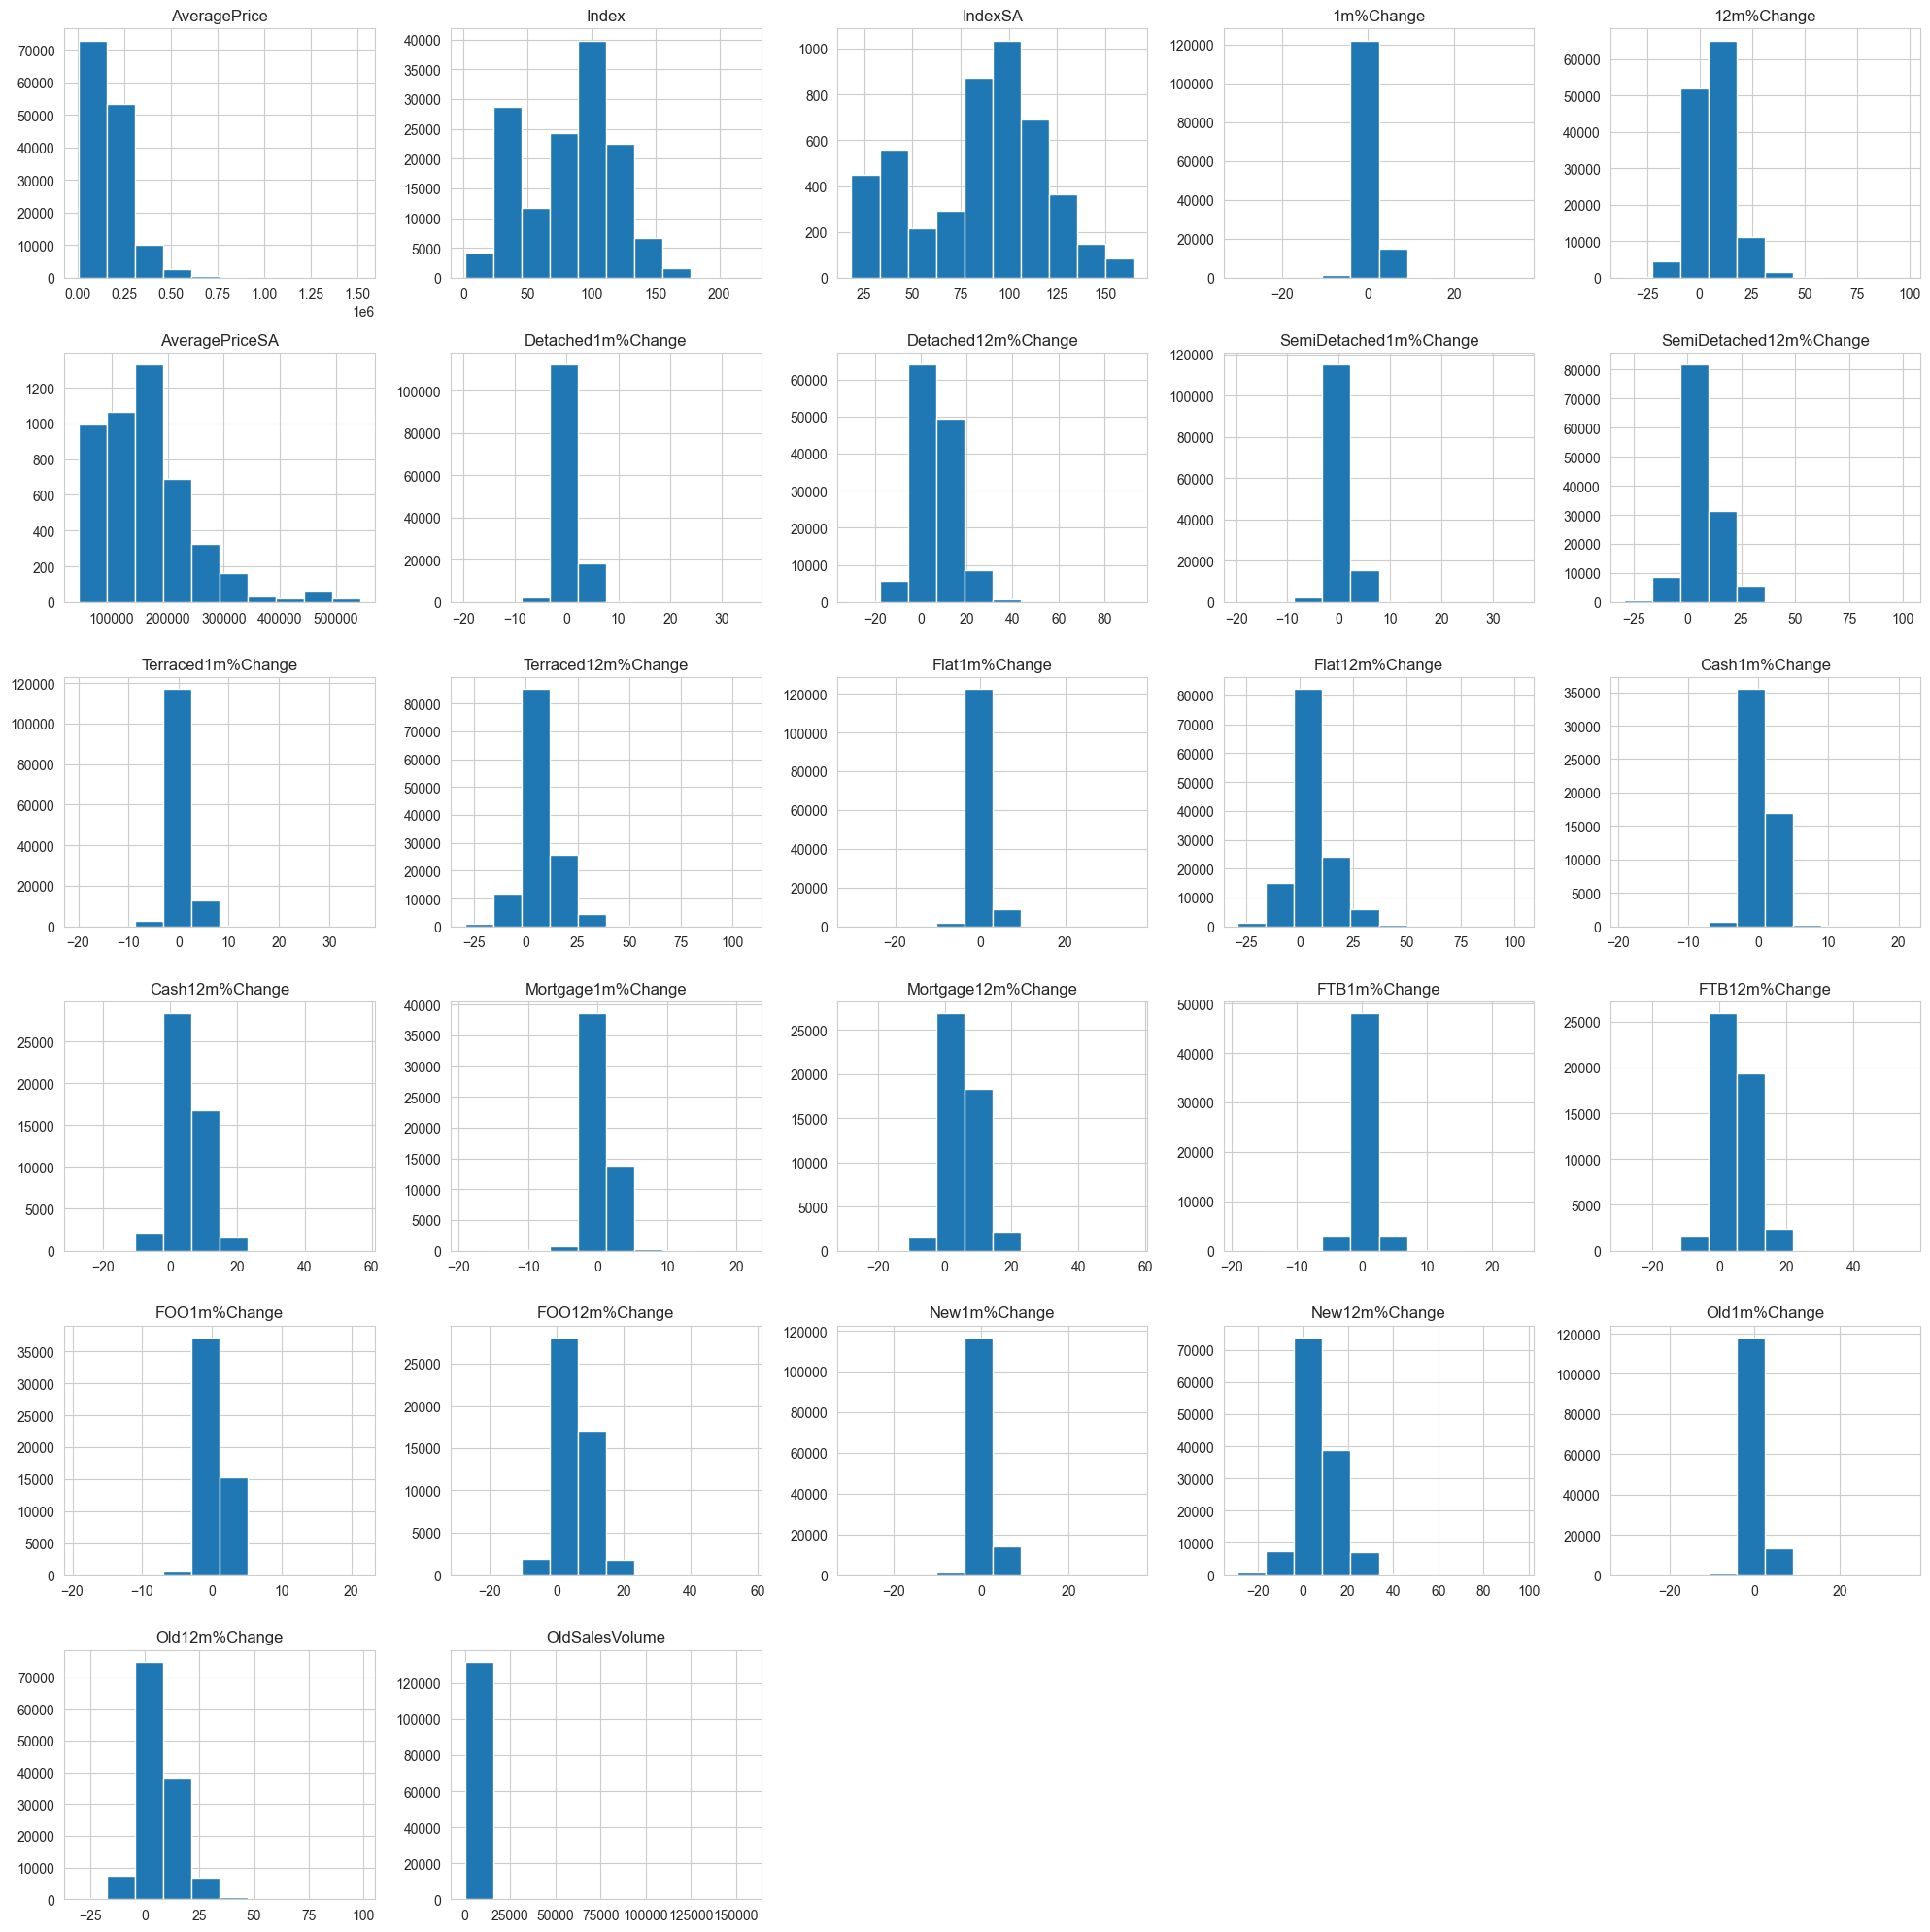

In [73]:
df.hist(figsize=(20,20));
plt.tight_layout();

In [74]:
y = ['AveragePrice','1m%Change','Detached1m%Change','Detached12m%Change','SemiDetached1m%Change','SemiDetached12m%Change',
     'Terraced1m%Change','Terraced12m%Change','Flat1m%Change','Flat12m%Change','Cash1m%Change','Cash12m%Change','Mortgage1m%Change'
     ,'Mortgage12m%Change','FTB1m%Change','FTB12m%Change','FOO1m%Change','FOO12m%Change','New1m%Change','New12m%Change','Old1m%Change',
     'Old12m%Change','OldSalesVolume']
for x in y:
    q = df[x].quantile(0.95)
    print(x, len(df[(df[x] < q)]))

AveragePrice 132886
1m%Change 132466
Detached1m%Change 126436
Detached12m%Change 122185
SemiDetached1m%Change 126447
SemiDetached12m%Change 122196
Terraced1m%Change 126473
Terraced12m%Change 122222
Flat1m%Change 126766
Flat12m%Change 122504
Cash1m%Change 50777
Cash12m%Change 46534
Mortgage1m%Change 50777
Mortgage12m%Change 46534
FTB1m%Change 51153
FTB12m%Change 46911
FOO1m%Change 50777
FOO12m%Change 46534
New1m%Change 125965
New12m%Change 121703
Old1m%Change 125987
Old12m%Change 121725
OldSalesVolume 126367


In [75]:
df[df['Mortgage1m%Change']>0]

Date                RegionName  AveragePrice       Index  \
99      01/04/2012             Aberdeenshire  172054.10210   86.063652   
100     01/05/2012             Aberdeenshire  175063.67630   87.569080   
101     01/06/2012             Aberdeenshire  177931.18720   89.003445   
102     01/07/2012             Aberdeenshire  178455.30000   89.265613   
103     01/08/2012             Aberdeenshire  178732.59480   89.404319   
...            ...                       ...           ...         ...   
139876  01/08/2022  Yorkshire and The Humber  210137.55996  154.321480   
139877  01/09/2022  Yorkshire and The Humber  212196.46925  155.833508   
139878  01/10/2022  Yorkshire and The Humber  212847.74493  156.311794   
139879  01/11/2022  Yorkshire and The Humber  213389.07508  156.709338   
139880  01/12/2022  Yorkshire and The Humber  214772.92559  157.725614   

           IndexSA  1m%Change  12m%Change  AveragePriceSA SalesVolume  \
99             NaN   0.843326   -3.623647             NaN       363.0   
100            NaN   1.749202   -3.682409             NaN       376.0   
101            NaN   1.637982   -3.328704             NaN       458.0   
102            NaN   0.294559   -2.985191             NaN       411.0   
103            NaN   0.155386   -2.139068             NaN       426.0   
...            ...        ...         ...             ...         ...   
139876  150.319473   1.236764   12.776098    204688.07871      6045.0   
139877  152.398906   0.979791    8.255976    207519.61594      5748.0   
139878  153.331542   0.306921   14.468328    208789.57454      5139.0   
139879  154.198872   0.254327   11.926162    209970.60707          NA   
139880  154.953046   0.648510   11.771683    210997.55586          NA   

       DetachedPrice  ...      NewPrice    NewIndex  New1m%Change  \
99       238766.5157  ...   185433.5731   84.432677      0.858398   
100      242653.6471  ...   188860.6509   85.993113      1.848143   
101      247262.6008  ...   191273.3224   87.091665      1.277488   
102      248539.6101  ...   190068.3154   86.542994     -0.629992   
103      248902.0922  ...   188647.8748   85.896231     -0.747332   
...              ...  ...           ...         ...           ...   
139876  345417.09278  ...  277208.81893  166.936064      3.611256   
139877  348373.64716  ...  293185.72928  176.557412      5.763493   
139878  350903.67141  ...  297876.42888  179.382167      1.599907   
139879  351099.15599  ...            NA          NA           NaN   
139880  353145.28745  ...            NA          NA           NaN   

       New12m%Change NewSalesVolume      OldPrice    OldIndex Old1m%Change  \
99         -4.403526           70.0   170715.0991   86.118802     0.842489   
100        -4.609283           89.0   173691.8502   87.620452     1.743695   
101        -3.958365          132.0   176571.7457   89.073242     1.658049   
102        -4.613357           73.0   177183.5885   89.381891     0.346512   
103        -4.031659           62.0   177547.9515   89.565698     0.205641   
...              ...            ...           ...         ...          ...   
139876     19.013100           81.0  205593.76353  153.158915     1.140580   
139877     17.682598           67.0  207214.55457  154.366338     0.788346   
139878     22.814526           31.0   207741.4216  154.758832     0.254262   
139879           NaN             NA            NA          NA          NaN   
139880           NaN             NA            NA          NA          NaN   

       Old12m%Change  OldSalesVolume  
99         -3.567298           293.0  
100        -3.614051           287.0  
101        -3.286912           326.0  
102        -2.885214           338.0  
103        -2.033952           364.0  
...              ...             ...  
139876     12.015619          5964.0  
139877      7.506289          5681.0  
139878     13.920166          5108.0  
139879           NaN             NaN  
139880           NaN             NaN  

[34691 rows x

In [76]:
df.drop(['Mortgage1m%Change'], axis = 1, inplace = True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139881 entries, 0 to 139880
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    139881 non-null  object 
 1   RegionName              139881 non-null  object 
 2   AveragePrice            139881 non-null  float64
 3   Index                   139881 non-null  float64
 4   IndexSA                 4704 non-null    float64
 5   1m%Change               139438 non-null  float64
 6   12m%Change              134841 non-null  float64
 7   AveragePriceSA          4704 non-null    float64
 8   SalesVolume             139881 non-null  object 
 9   DetachedPrice           139881 non-null  object 
 10  DetachedIndex           139881 non-null  object 
 11  Detached1m%Change       133091 non-null  float64
 12  Detached12m%Change      128616 non-null  float64
 13  SemiDetachedPrice       139881 non-null  object 
 14  SemiDetachedIndex   

In [78]:
y = ['AveragePrice','1m%Change','Detached1m%Change','Detached12m%Change','SemiDetached1m%Change','SemiDetached12m%Change',
     'Terraced1m%Change','Terraced12m%Change','Flat1m%Change','Flat12m%Change','Cash1m%Change','Cash12m%Change',
     'Mortgage12m%Change','FTB1m%Change','FTB12m%Change','FOO1m%Change','FOO12m%Change','New1m%Change','New12m%Change','Old1m%Change',
     'Old12m%Change','OldSalesVolume']
for x in y:
    q = df[x].quantile(0.99)
    print(x, len(df[(df[x] < q)]))

AveragePrice 138482
1m%Change 138043
Detached1m%Change 131760
Detached12m%Change 127329
SemiDetached1m%Change 131771
SemiDetached12m%Change 127341
Terraced1m%Change 131798
Terraced12m%Change 127368
Flat1m%Change 132103
Flat12m%Change 127662
Cash1m%Change 52915
Cash12m%Change 48494
Mortgage12m%Change 48494
FTB1m%Change 53307
FTB12m%Change 48886
FOO1m%Change 52915
FOO12m%Change 48494
New1m%Change 131269
New12m%Change 126827
Old1m%Change 131291
Old12m%Change 126850
OldSalesVolume 131687


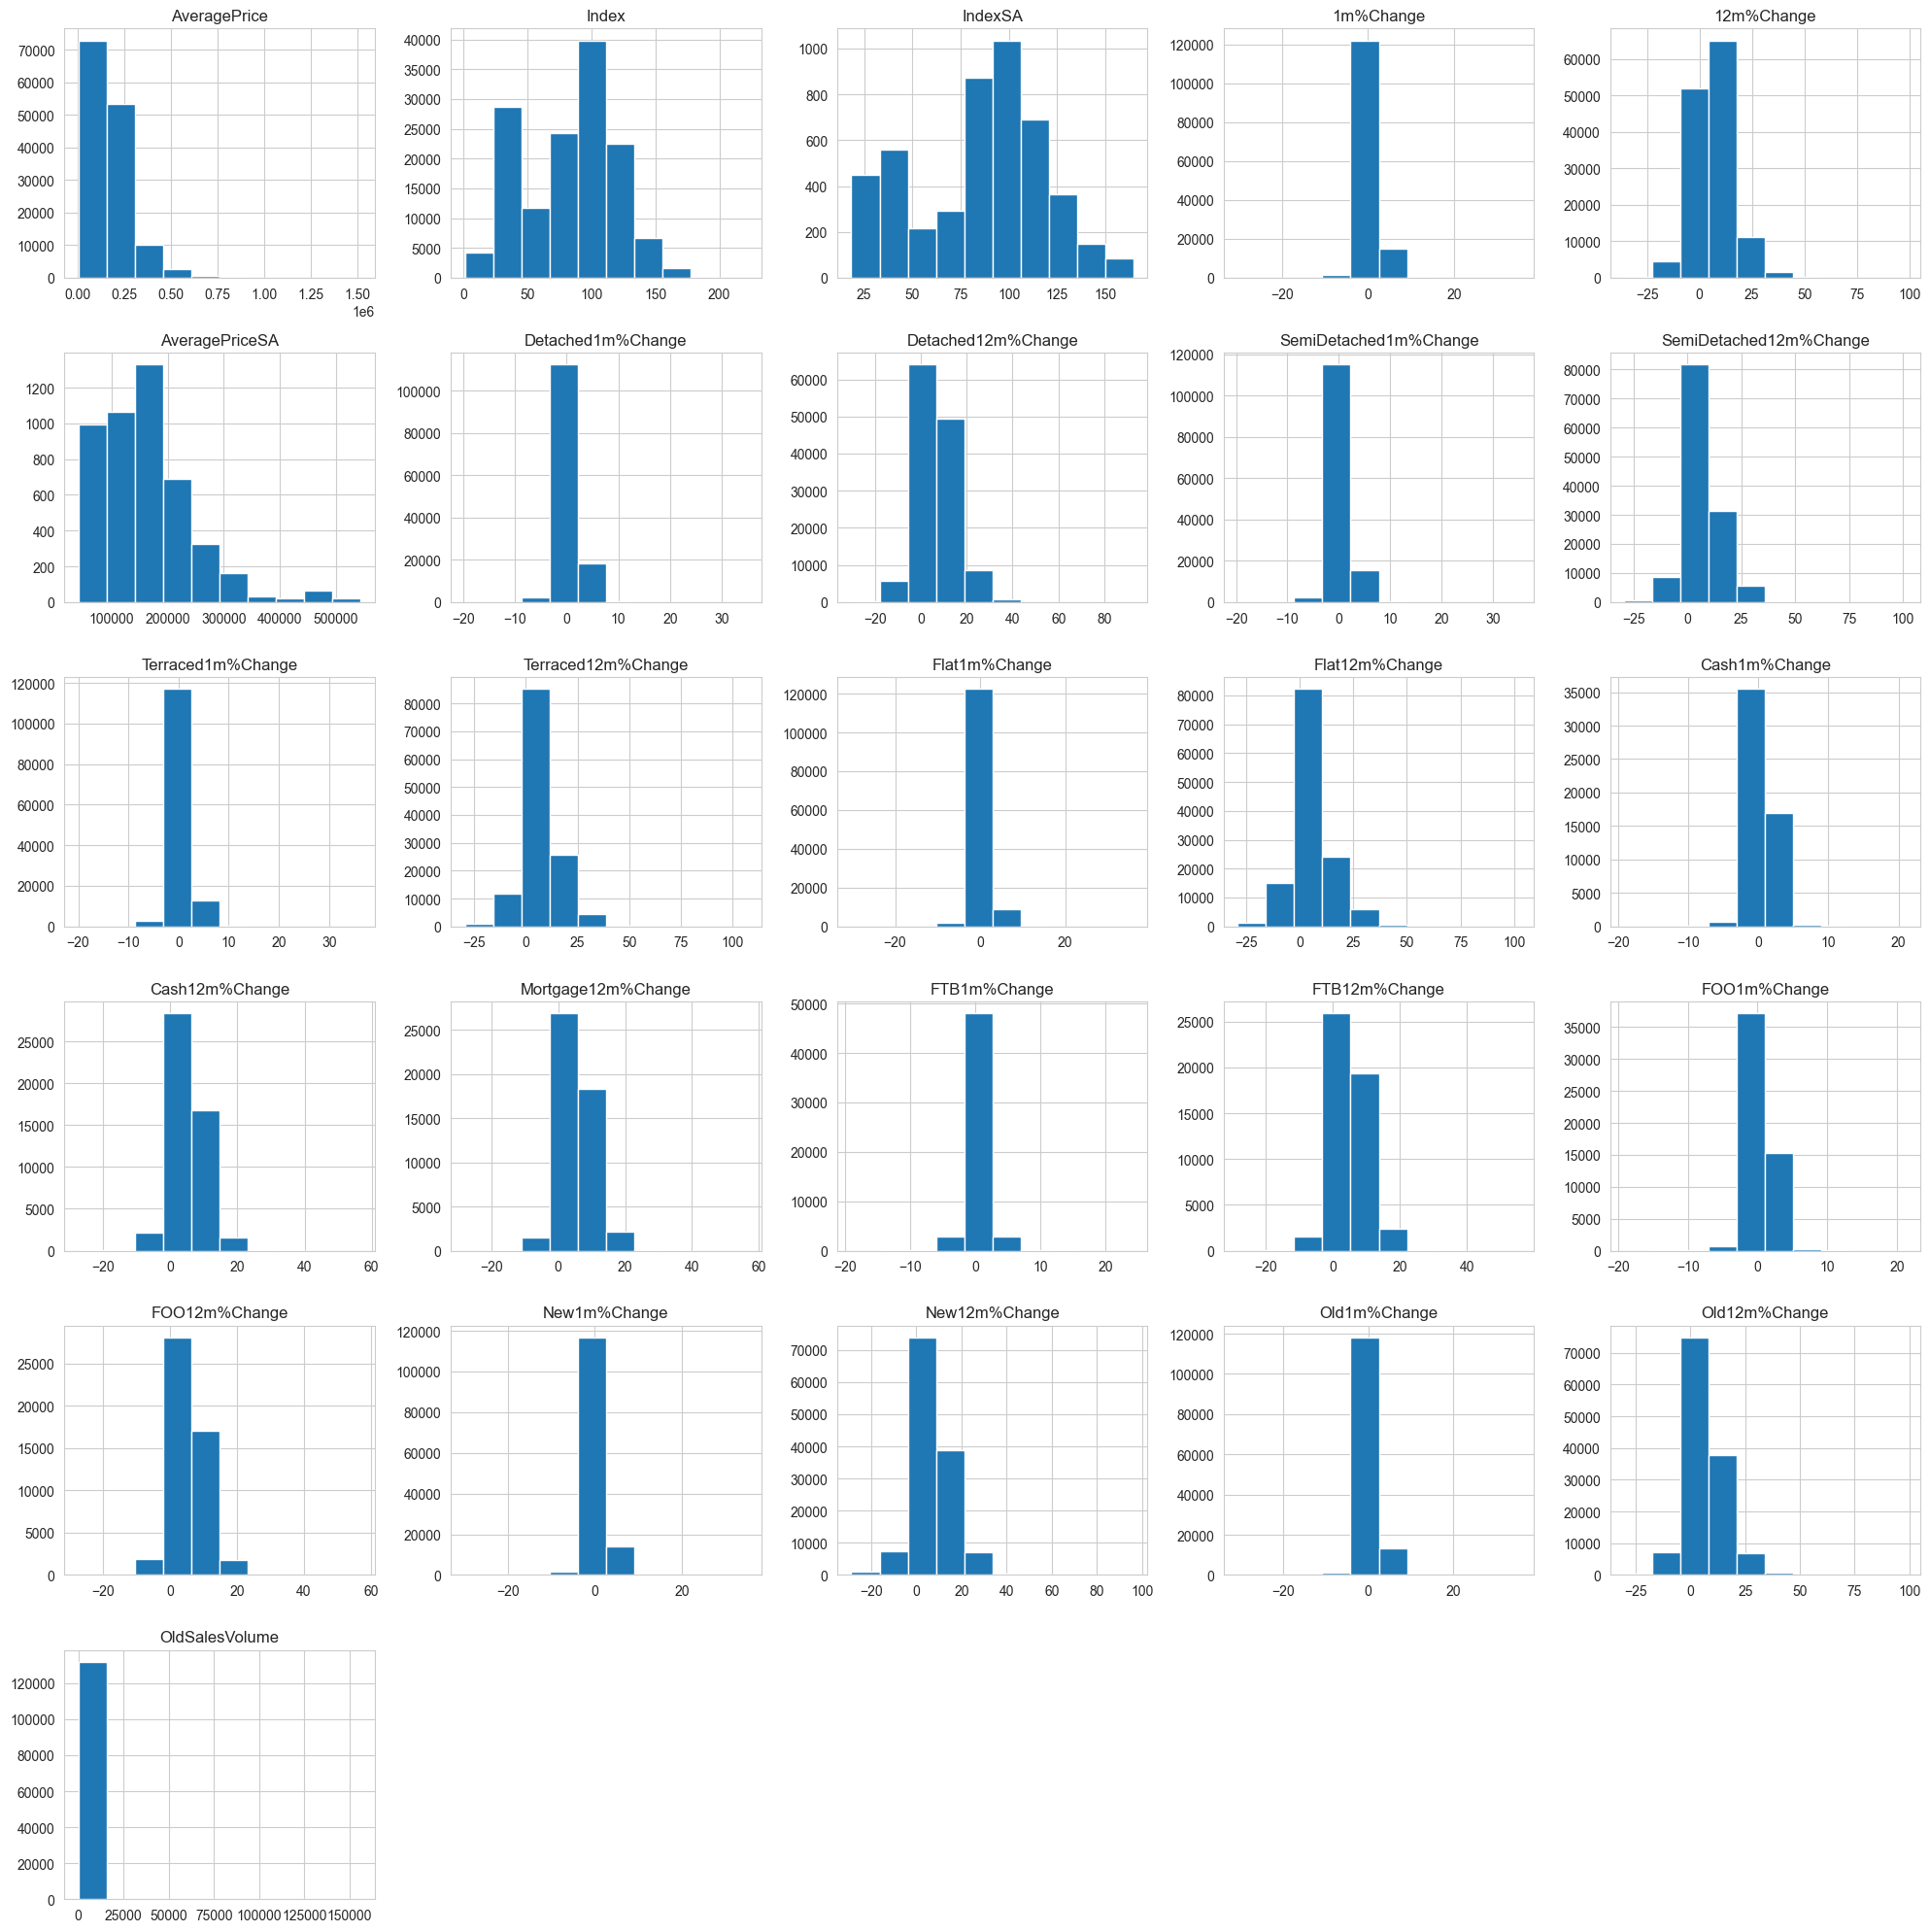

In [79]:
df.hist(figsize = (20,20));
plt.tight_layout();

<Axes: >

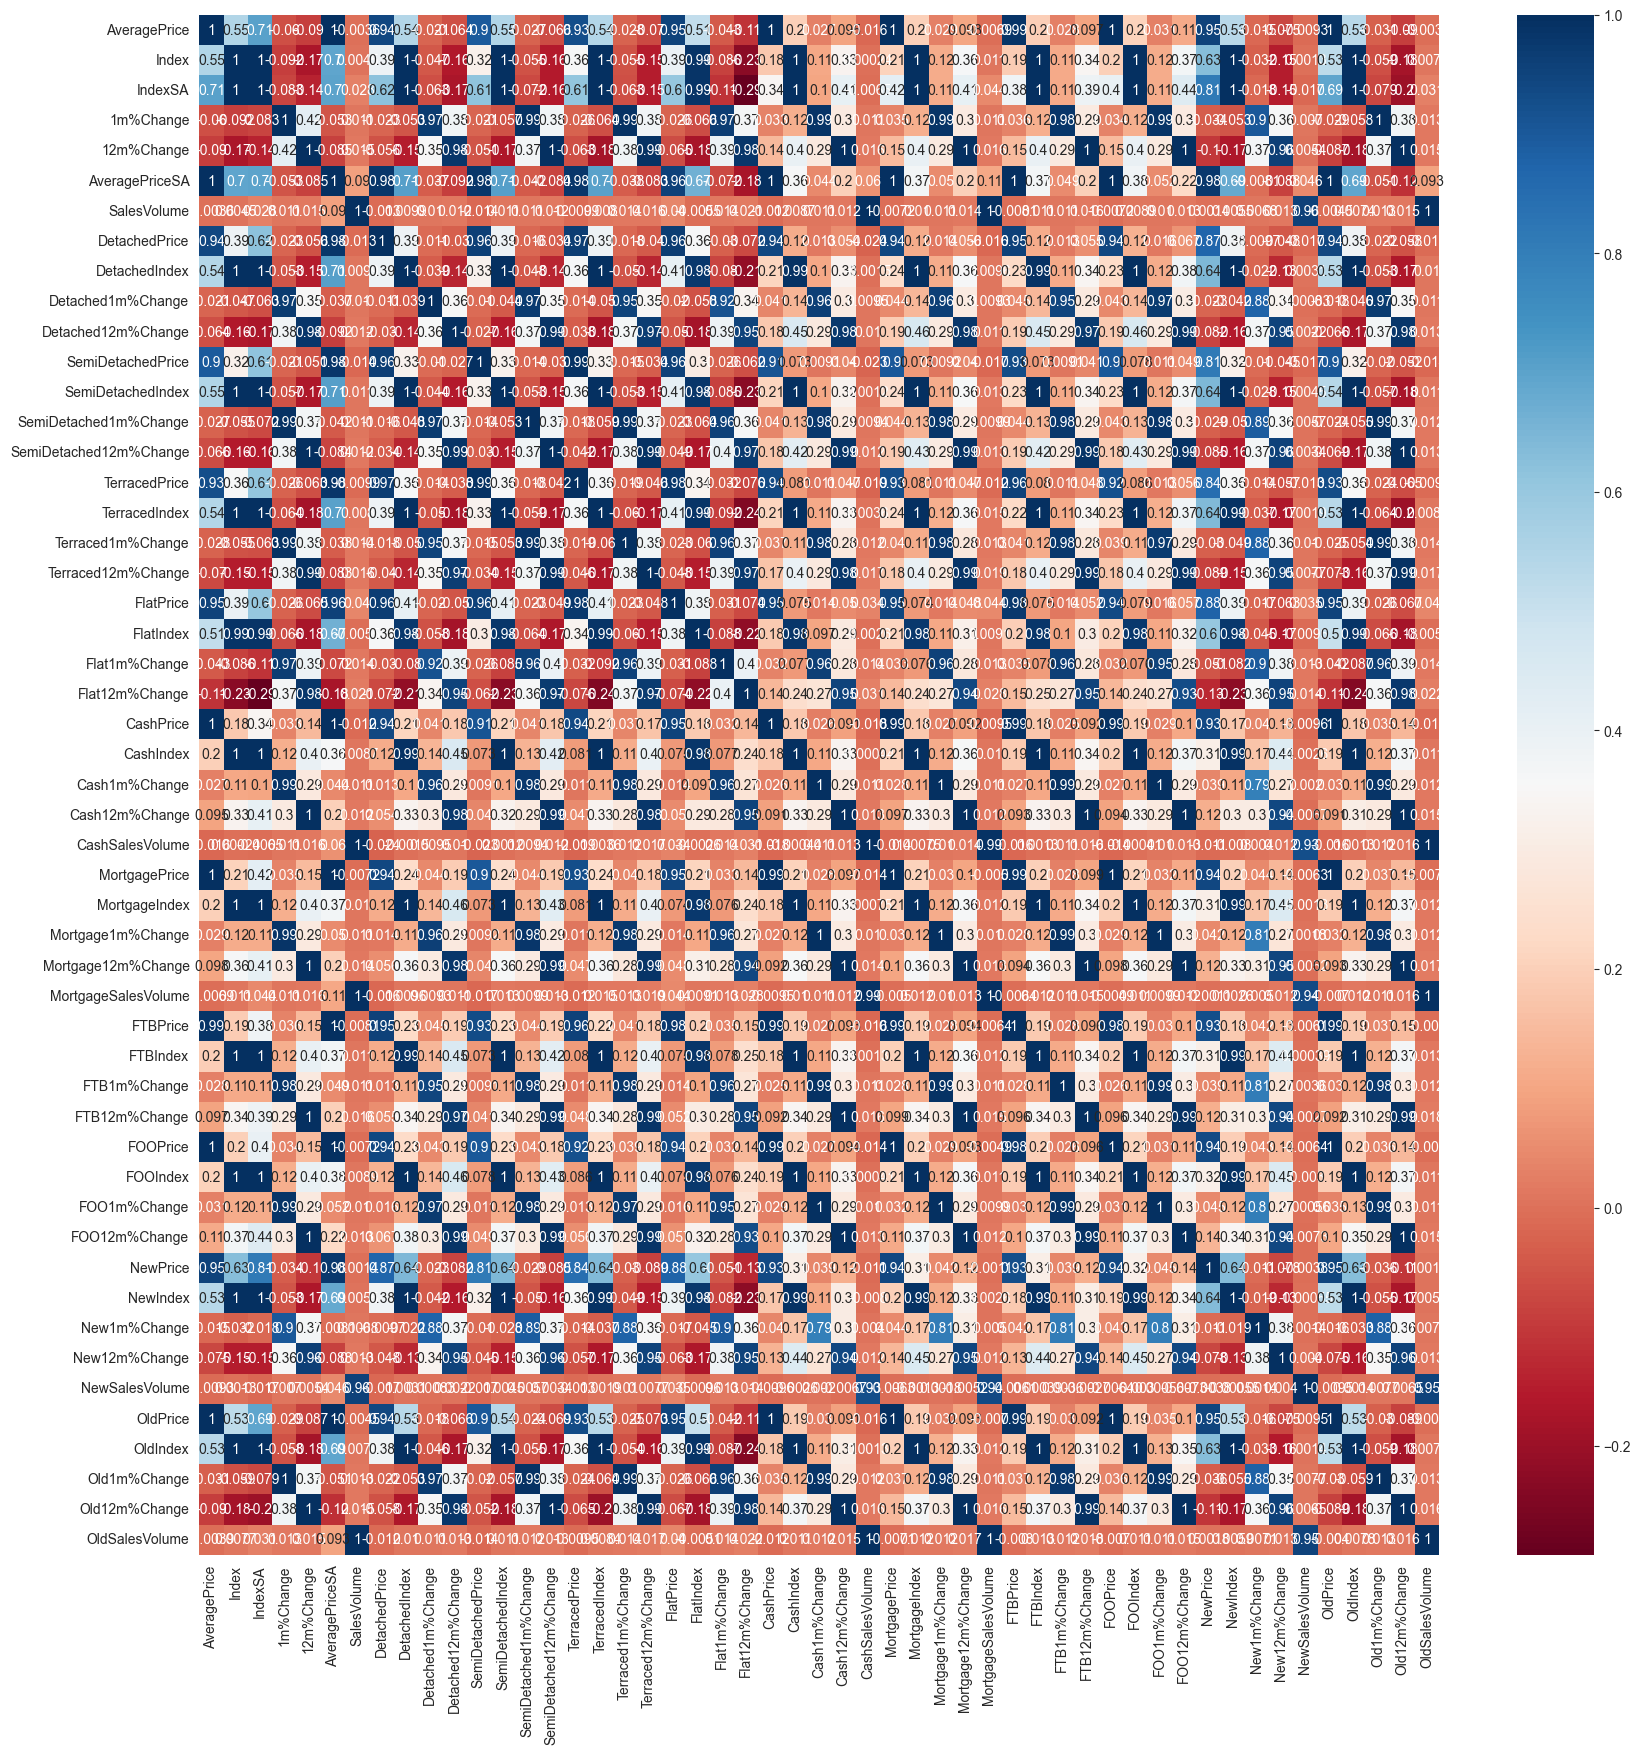

In [80]:
df = pd.read_csv("C:\\Users\\ramri\\Downloads\\UKHPI.csv")
df = df.drop(["Date","RegionName","AreaCode"], axis = 1)
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap = 'RdBu', annot=True)

In [81]:
# Scatterplot of MortgageIndex and MortgagePrice as these are among the list of strongly correlated parameters

Text(0, 0.5, 'MortgagePrice')

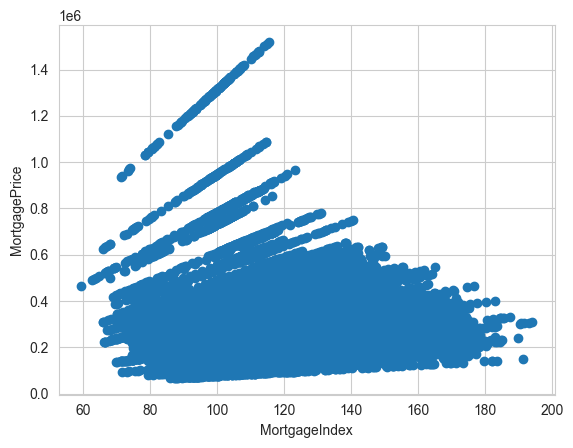

In [82]:
plt.scatter(df.MortgageIndex, df.MortgagePrice)
plt.xlabel("MortgageIndex")
plt.ylabel("MortgagePrice")

Text(0, 0.5, 'CashSalesVolume')

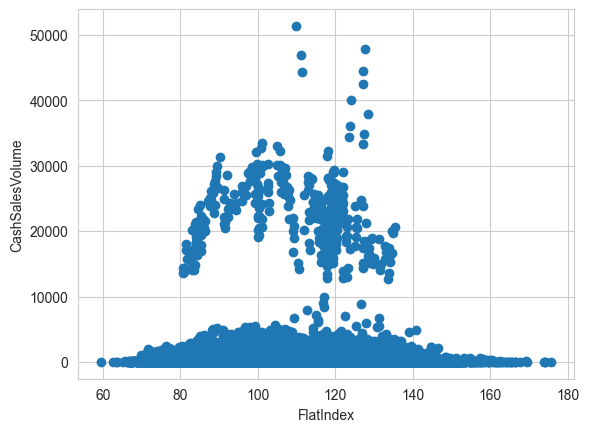

In [83]:
plt.scatter(df.FlatIndex, df.CashSalesVolume)
plt.xlabel("FlatIndex")
plt.ylabel("CashSalesVolume")

<Axes: >

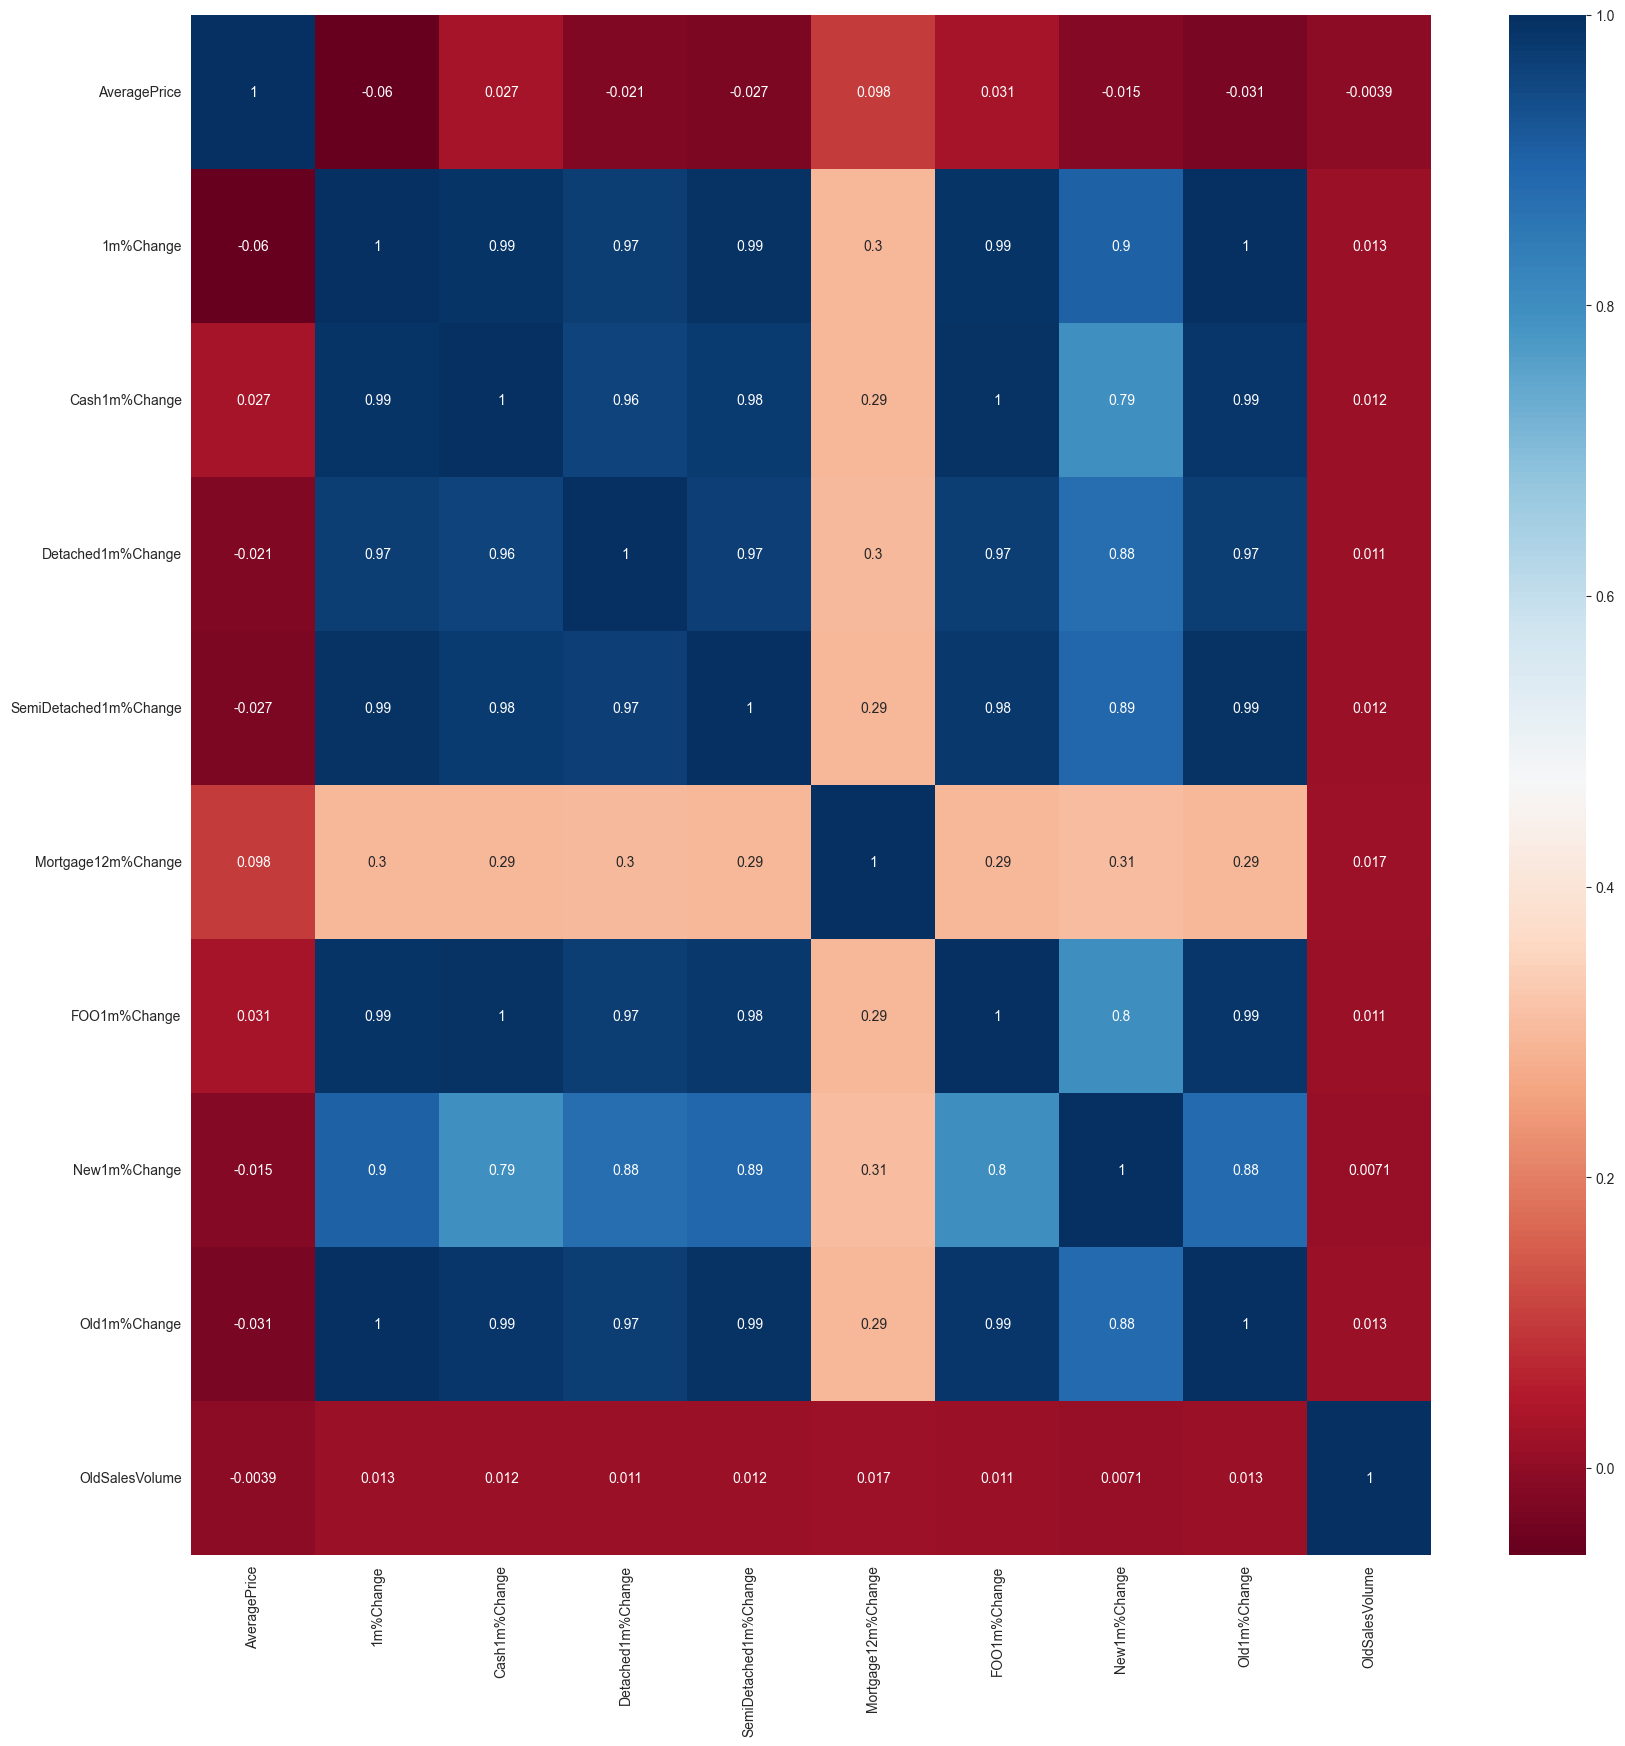

In [84]:
#CATEGORIZING COLUMNS
numeric_col = ['AveragePrice','1m%Change','Cash1m%Change','Detached1m%Change','SemiDetached1m%Change','Mortgage12m%Change',
               'FOO1m%Change','New1m%Change','Old1m%Change','OldSalesVolume']
#HEATMAP OF NUMERICAL DATA
plt.figure(figsize=(20,20))
sns.heatmap(df[numeric_col].corr(), cmap = 'RdBu', annot=True)

In [85]:
# Analysing which Area has maximum, minimum and average price
df = pd.read_csv("C:\\Users\\ramri\\Downloads\\UKHPI.csv")
dfv = df.groupby(['AreaCode', 'RegionName']).AveragePrice.agg(['mean'])
dfv.style.highlight_max(color = "green").highlight_min(color = "blue")

In [86]:
# Analysing which Area has maximum, minimum number of sold houses
dfs = df.groupby(['AreaCode', 'RegionName']).agg({'RegionName': 'count'})
dfs.style.highlight_max(color = "brown").highlight_min(color = "red")

In [87]:
# Calculating Net Price and Net Sales Volume Percentage
df['Net_Price_Percentage'] = (df['NewPrice'] - df['OldPrice']) / (df['NewPrice'] + df['OldPrice']) * 100
df['Net_Sales_Volume_Percentage'] = (df['NewSalesVolume'] - df['OldSalesVolume']) / (df['SalesVolume']) * 100
df.head()

Date     RegionName   AreaCode  AveragePrice      Index  IndexSA  \
0  01/01/2004  Aberdeenshire  S12000034   81693.66964  40.864214      NaN   
1  01/02/2004  Aberdeenshire  S12000034   81678.76231  40.856757      NaN   
2  01/03/2004  Aberdeenshire  S12000034   83525.09702  41.780317      NaN   
3  01/04/2004  Aberdeenshire  S12000034   84333.67900  42.184780      NaN   
4  01/05/2004  Aberdeenshire  S12000034   86379.95396  43.208353      NaN   

   1m%Change  12m%Change  AveragePriceSA  SalesVolume  ...  New1m%Change  \
0        NaN         NaN             NaN        388.0  ...           NaN   
1  -0.018248         NaN             NaN        326.0  ...      0.192576   
2   2.260483         NaN             NaN        453.0  ...      1.907838   
3   0.968071         NaN             NaN        571.0  ...      0.025432   
4   2.426403         NaN             NaN        502.0  ...      1.848208   

   New12m%Change  NewSalesVolume     OldPrice   OldIndex  Old1m%Change  \
0            NaN           103.0  81043.95084  40.883367           NaN   
1            NaN           107.0  80965.29542  40.843688     -0.097053   
2            NaN           140.0  82903.23948  41.821302      2.393549   
3            NaN           180.0  84003.99161  42.376586      1.327755   
4            NaN           167.0  86222.73484  43.495852      2.641235   

   Old12m%Change  OldSalesVolume  Net_Price_Percentage  \
0            NaN           285.0              4.361686   
1            NaN           219.0              4.506146   
2            NaN           313.0              4.268861   
3            NaN           391.0              3.623076   
4            NaN           335.0              3.235722   

   Net_Sales_Volume_Percentage  
0                   -46.907216  
1                   -34.355828  
2                   -38.189845  
3                   -36.952715  
4                   -33.466135  

[5 rows x 56 columns]

Text(0.5, 1.0, 'Region Vs Net_Price_Percentage')

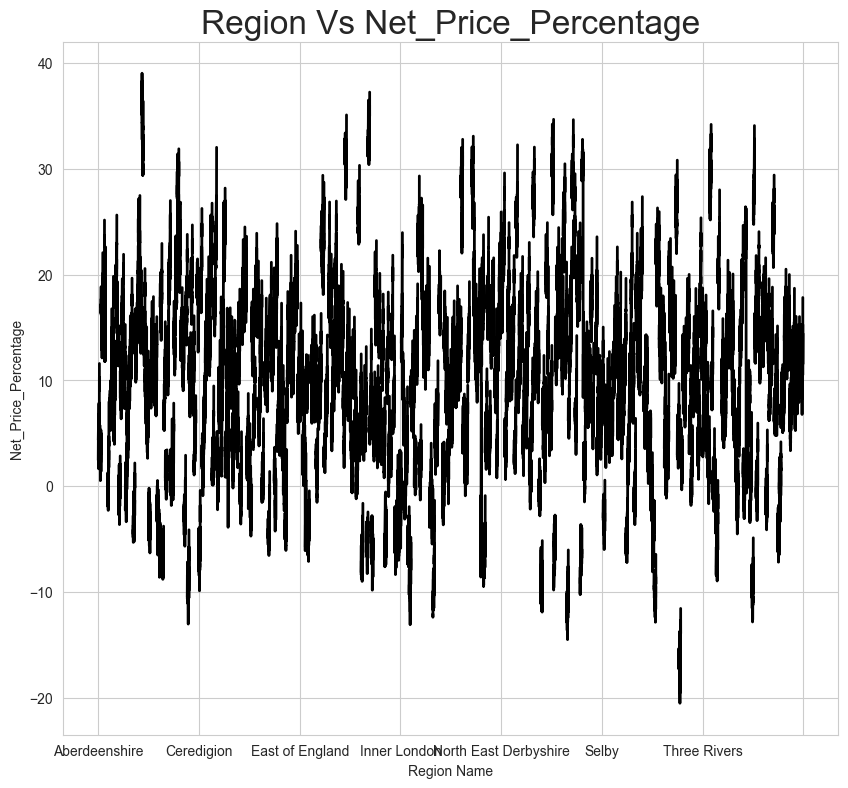

In [88]:
# Region Vs Net_Price_Percentage
df.set_index('RegionName')['Net_Price_Percentage'].plot(figsize = (10, 9), linewidth = 2, color = 'black')
plt.xlabel("Region Name")
plt.ylabel("Net_Price_Percentage")
plt.title("Region Vs Net_Price_Percentage",  fontsize=24)

Text(0.5, 1.0, 'Region Vs Net_Sales_Volume_Percentage')

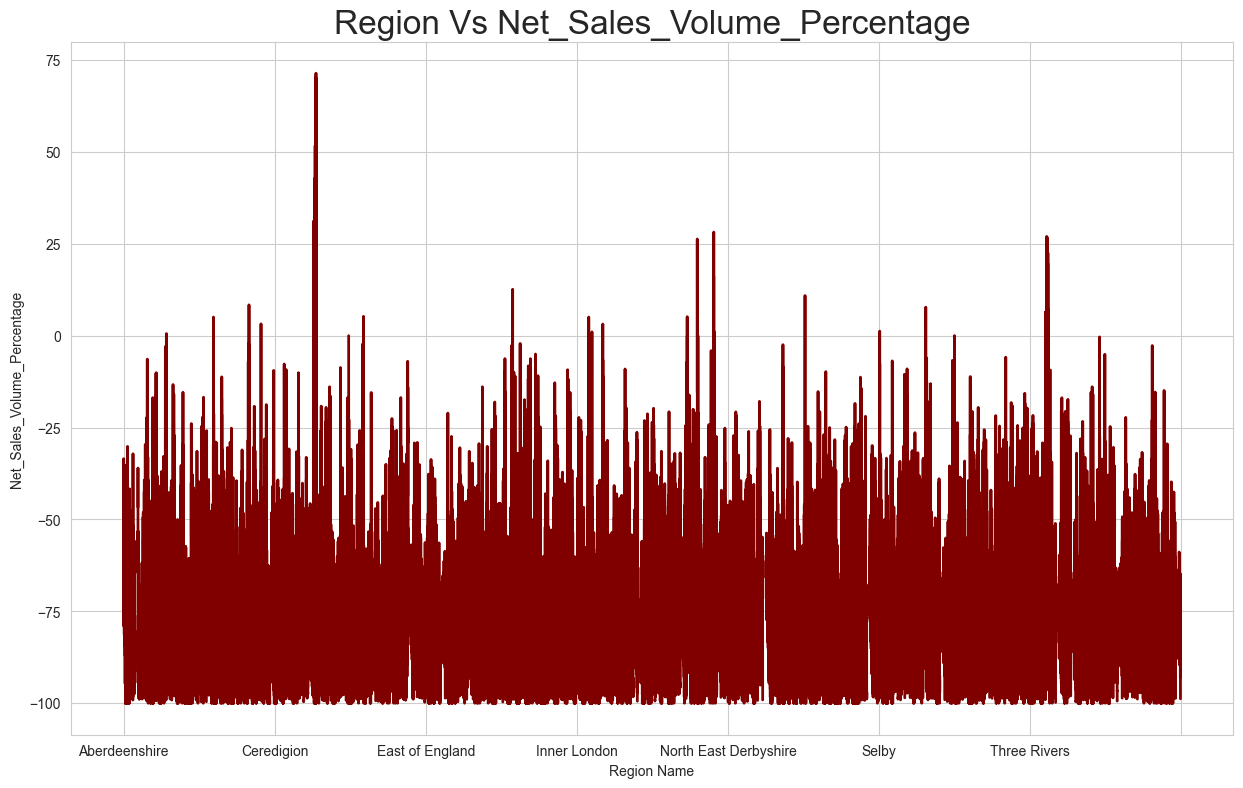

In [89]:
# Region Vs Net_Sales_Volume_Percentage
df.set_index('RegionName')['Net_Sales_Volume_Percentage'].plot(figsize = (15, 9), linewidth = 2, color = 'maroon')
plt.xlabel("Region Name")
plt.ylabel("Net_Sales_Volume_Percentage")
plt.title("Region Vs Net_Sales_Volume_Percentage",  fontsize=24)

In [90]:
#Region vs Index
df.groupby(['RegionName']).Index.agg(['mean', 'min', 'max', 'median'])

mean        min         max      median
RegionName                                                            
Aberdeenshire             85.901432  40.856757  105.284636   90.031528
Adur                      79.824062  19.796341  158.045111   80.344506
Allerdale                 84.626492  29.958204  142.469717  100.829486
Amber Valley              84.243477  28.311783  164.780641   91.122958
Angus                     95.458808  50.916745  127.402411   97.864076
...                             ...        ...         ...         ...
Wychavon                  85.283307  28.733784  153.023115   92.509138
Wyre                      87.180399  37.445973  146.307801  100.199580
Wyre Forest               88.219044  30.790417  163.002530   94.721072
York                      80.193871  25.348623  154.227502   86.080026
Yorkshire and The Humber  51.305441   1.991658  157.725614   34.457673

[421 rows x 4 columns]

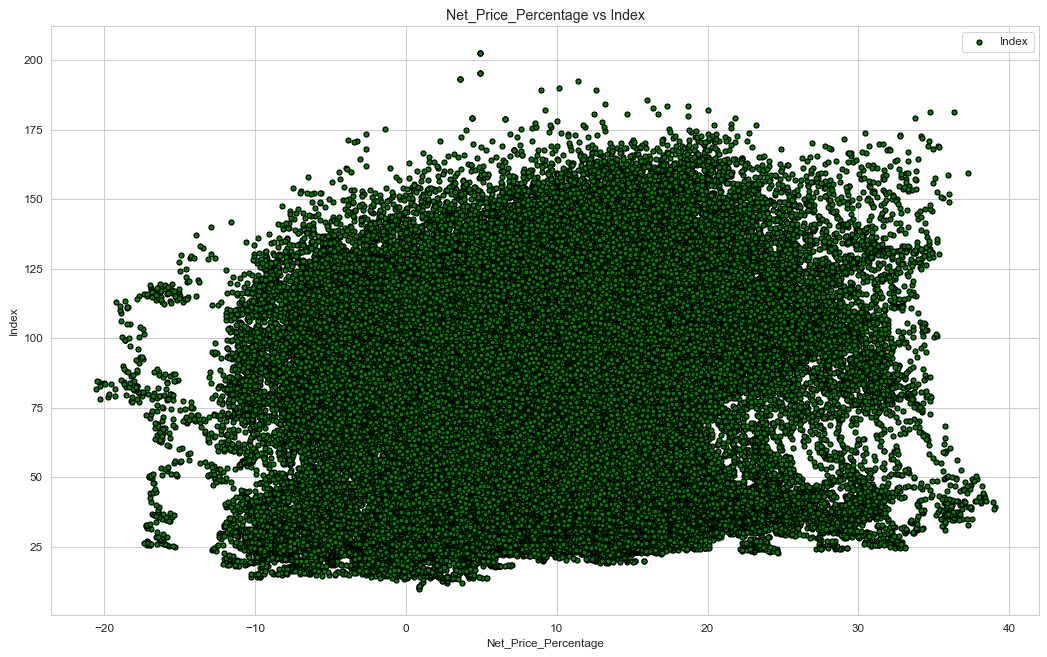

In [91]:
# SCATTER PLOT OF Net_Price_Percentage VS INDEX
plt.figure(figsize = (15, 9), dpi = 85)
plt.scatter(df['Net_Price_Percentage'], df['Index'], s = 18, edgecolor = "black", c = "green", label = "Index")
plt.xlabel("Net_Price_Percentage")
plt.ylabel("Index")
plt.title("Net_Price_Percentage vs Index")
plt.legend()
plt.show()

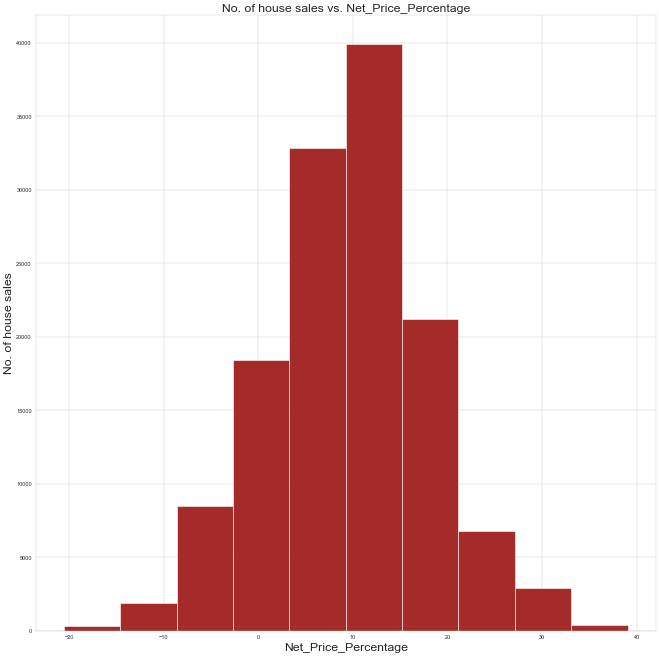

In [92]:
plt.figure(figsize = (20, 20), dpi = 40)
df['Net_Price_Percentage'].plot(kind = 'hist', color = 'brown');
plt.xlabel("Net_Price_Percentage", fontsize = 22)
plt.ylabel("No. of house sales", fontsize = 22)
plt.title("No. of house sales vs. Net_Price_Percentage", fontsize = 22)
plt.show()

In [93]:
# Feature selection
# Splitting dataset into training and testing data.
df = df.fillna(0)
df = df.drop(['Date', 'RegionName', 'AreaCode'], axis = 1)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [94]:
# Rescaling features
numeric_col = ['AveragePrice','1m%Change','Cash1m%Change','Detached1m%Change','SemiDetached1m%Change','Mortgage12m%Change',
               'FOO1m%Change','New1m%Change','Old1m%Change','OldSalesVolume']
scaler = MinMaxScaler()
df_train[numeric_col] = scaler.fit_transform(df_train[numeric_col])
df_train.head()

AveragePrice       Index  IndexSA  1m%Change  12m%Change  \
115976      0.031790   27.173104      0.0   0.525244    0.000000   
15074       0.020567   46.515080      0.0   0.458843   10.675504   
93283       0.432664  110.705675      0.0   0.457263    0.110016   
159         0.125047   95.909410      0.0   0.497822   -1.993660   
72896       0.122035   93.110262      0.0   0.495140   -1.803300   

        AveragePriceSA  SalesVolume  DetachedPrice  DetachedIndex  \
115976             0.0        137.0   8.250580e+04      27.831925   
15074              0.0        219.0   7.148272e+04      53.545608   
93283              0.0        203.0   1.381624e+06     112.635944   
159                0.0        353.0   2.711818e+05      96.550724   
72896              0.0        101.0   2.729054e+05      92.922073   

        Detached1m%Change  ...  New1m%Change  New12m%Change  NewSalesVolume  \
115976           0.435490  ...      0.545643       0.000000            11.0   
15074            0.351999  ...      0.457194      12.026277             7.0   
93283            0.367360  ...      0.469019      -2.754499             7.0   
159              0.402853  ...      0.485636      -1.141164            35.0   
72896            0.402077  ...      0.493042      -3.961035             8.0   

            OldPrice    OldIndex  Old1m%Change  Old12m%Change  OldSalesVolume  \
115976   49488.58059   26.888758      0.523073       0.000000        0.000819   
15074    33505.20969   46.434383      0.459370      10.608721        0.001378   
93283   659552.35280  110.714794      0.456635       0.233897        0.001274   
159     189996.89410   95.845681      0.500117      -1.916507        0.002067   
72896   187611.00700   93.460671      0.495486      -1.517837        0.000604   

        Net_Price_Percentage  Net_Sales_Volume_Percentage  
115976             11.331325                   -83.941606  
15074              17.490358                   -93.607306  
93283              -9.824567                   -93.103448  
159                 6.481143                   -80.169972  
72896              -0.601807                   -84.158416  

[5 rows x 53 columns]

In [95]:
df_test[numeric_col] = scaler.transform(df_test[numeric_col])

In [96]:
# Feature selection
# RFE
X_train = df_train.drop(['AveragePriceSA'], axis = 1)
Y_train = df_train.AveragePrice
X_test = df_test.drop(['AveragePriceSA'], axis = 1)
Y_test = df_test.AveragePrice

In [97]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
rfe = RFE(lr, n_features_to_select = 25)
rfe = rfe.fit(X_train, Y_train)

In [98]:
c = list(X_train.columns[rfe.support_])

In [99]:
X_train = df_train[c]
X_test = df_test[c]

In [100]:
pip install scipy

In [101]:
# VARIANCE INFLATION FACTOR
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                  Features        VIF
14           MortgageIndex  102328.82
17                FOOIndex  101010.75
11               CashIndex   35395.62
4    SemiDetached1m%Change    9638.74
15      Mortgage12m%Change    9561.27
23            Old1m%Change    8067.37
2        Detached1m%Change    2793.54
20            New1m%Change    1477.92
22                OldIndex    1031.56
1                1m%Change     971.75
18           FOO12m%Change     902.08
13          Cash12m%Change     865.11
19                NewIndex     839.83
12           Cash1m%Change     670.37
6            TerracedIndex     638.22
9                FlatIndex     624.94
5   SemiDetached12m%Change     400.71
8       Terraced12m%Change     189.20
16           FTB12m%Change     161.48
24           Old12m%Change     158.13
3       Detached12m%Change     121.54
10          Flat12m%Change      63.99
7        Terraced1m%Change      48.66
21           New12m%Change      34.48
0             AveragePrice       4.92


<Axes: >

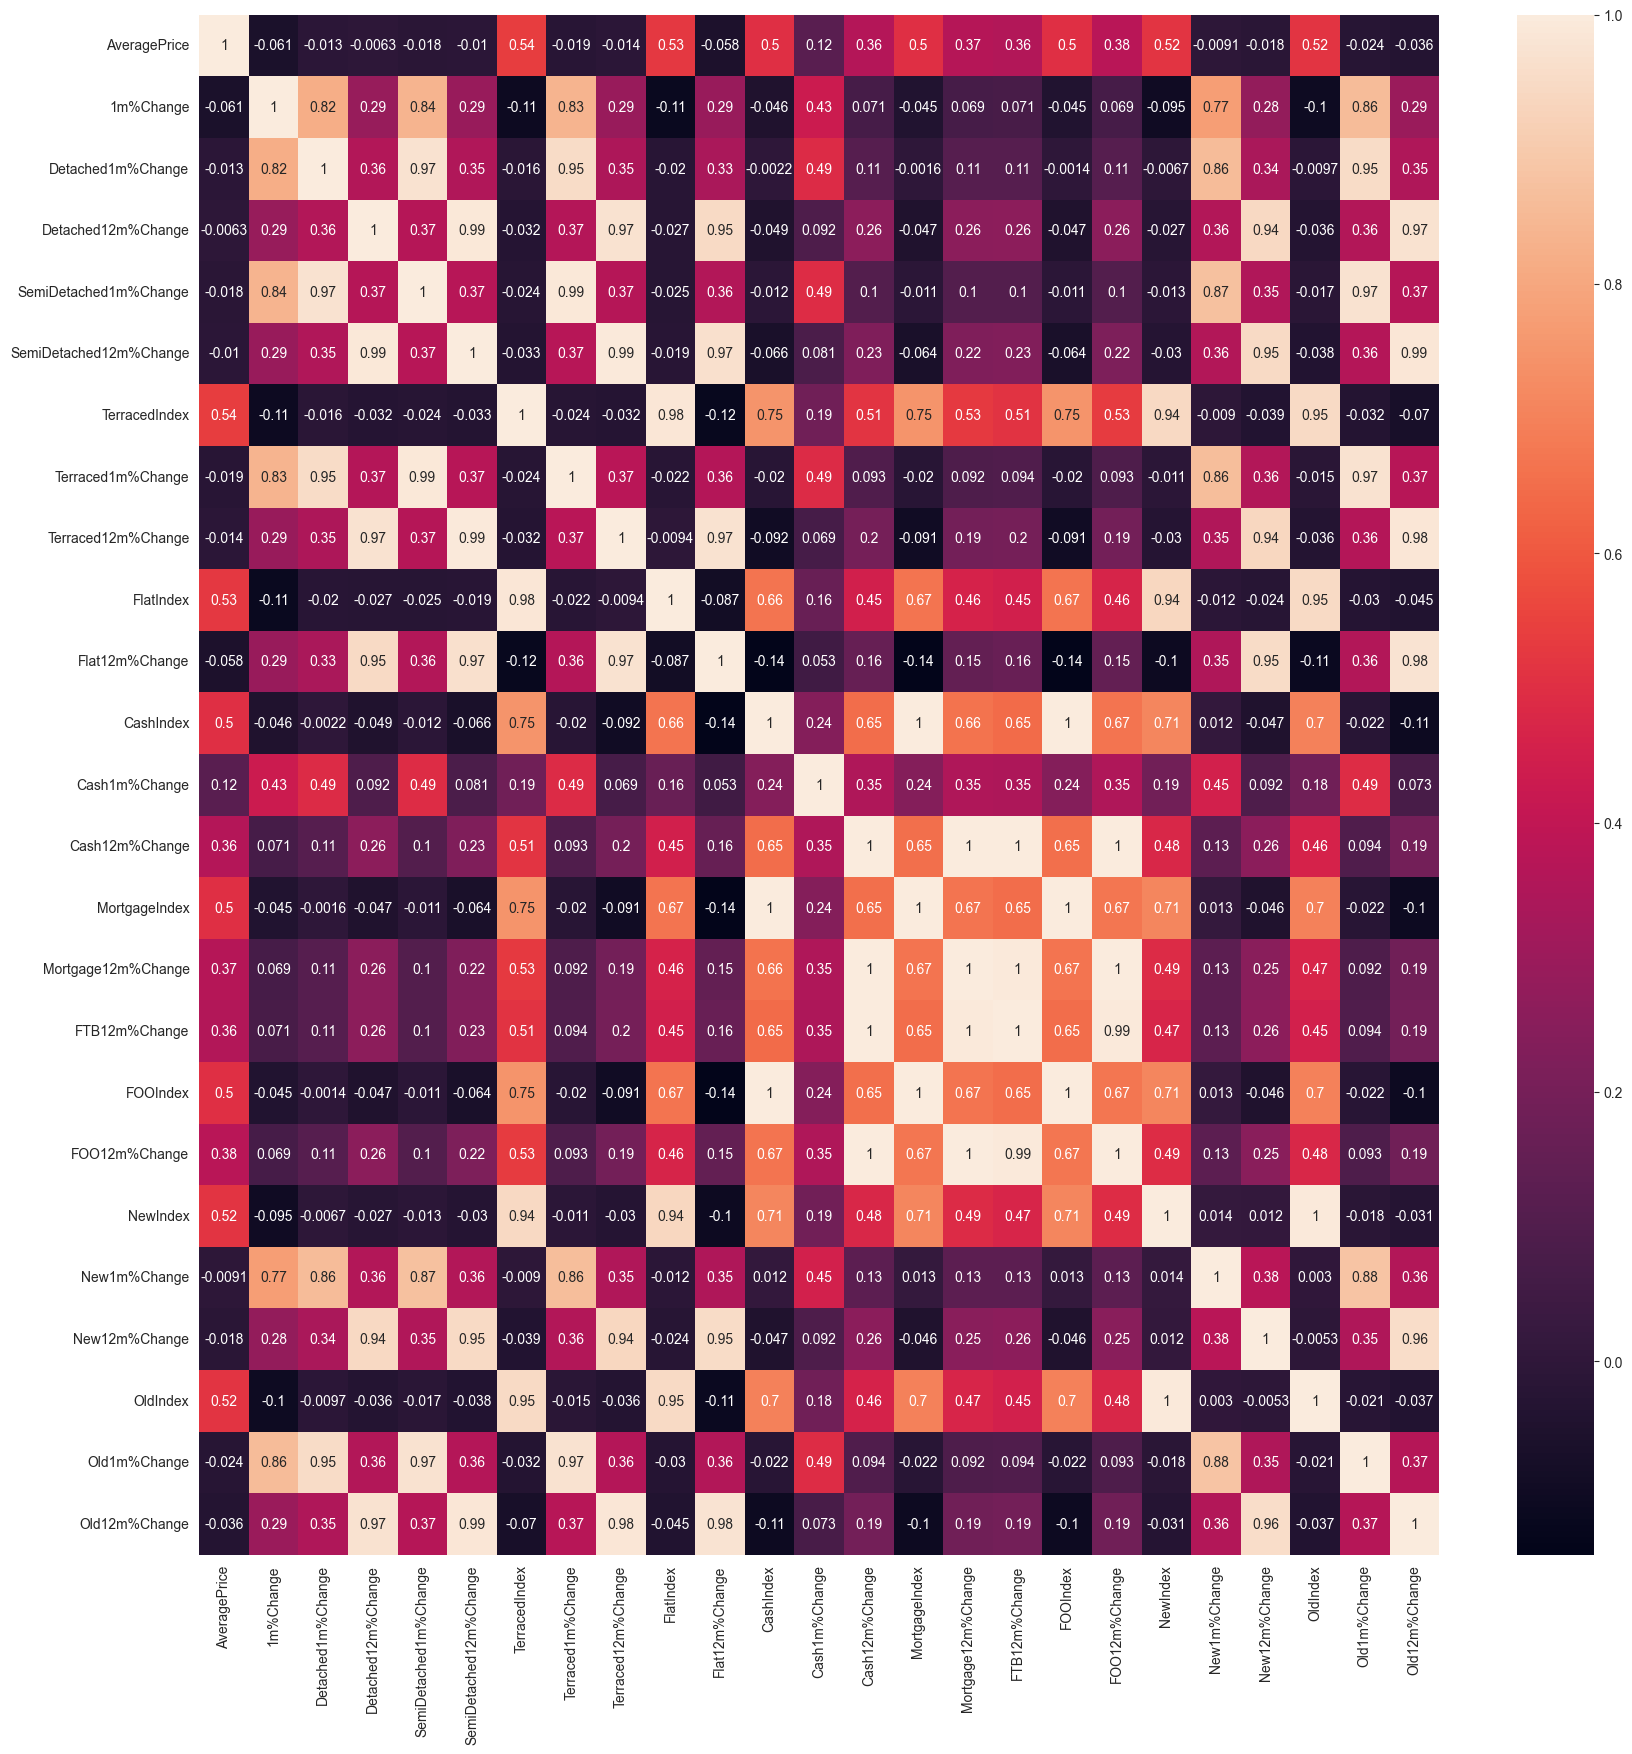

In [103]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[c].corr(), annot = True)

In [104]:
# HIGH CORRELATION PAIRS
#1. FTB12m%Change - FOO12m%Change (0.99)

In [105]:
for i in ['FTB12m%Change']:
    c.remove(i)
X_train = df_train[c]
X_test = df_test[c]

In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                  Features       VIF
16                FOOIndex  98702.59
14           MortgageIndex  96950.80
11               CashIndex  34757.04
4    SemiDetached1m%Change   9588.11
15      Mortgage12m%Change   9412.57
22            Old1m%Change   8032.83
2        Detached1m%Change   2791.93
19            New1m%Change   1477.73
21                OldIndex   1031.45
1                1m%Change    971.73
17           FOO12m%Change    900.54
18                NewIndex    837.95
13          Cash12m%Change    718.65
12           Cash1m%Change    670.35
6            TerracedIndex    637.45
9                FlatIndex    624.93
5   SemiDetached12m%Change    398.64
8       Terraced12m%Change    188.66
23           Old12m%Change    158.13
3       Detached12m%Change    120.78
10          Flat12m%Change     63.98
7        Terraced1m%Change     47.99
20           New12m%Change     34.40
0             AveragePrice      4.92


In [107]:
# MODEL BUILDING
# 1. SIMPLE LINEAR REGRESSION : BASELINE

In [108]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_train_predicted = lm.predict(X_train)
print(r2_score(y_true = Y_train, y_pred = Y_train_predicted))

Y_test_predicted = lm.predict(X_test)
print(r2_score(y_true = Y_test, y_pred = Y_test_predicted))

1.0
1.0


In [109]:
# RESIDUE ANALYSIS

C:\Users\ramri\AppData\Local\Temp\ipykernel_10532\1429283481.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


Text(0.5, 0, 'RESIDUE')

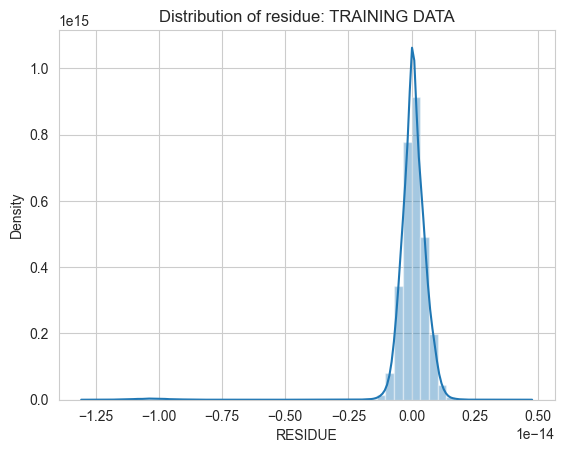

In [110]:
# TRAINING SET EVALUATION
x = Y_train - Y_train_predicted

sns.distplot(x)
plt.title('Distribution of residue: TRAINING DATA')
plt.xlabel('RESIDUE')

Text(0.5, 1.0, 'QQ PLOT OF RESIDUE DISTRIBUTION : TRAINING DATA')

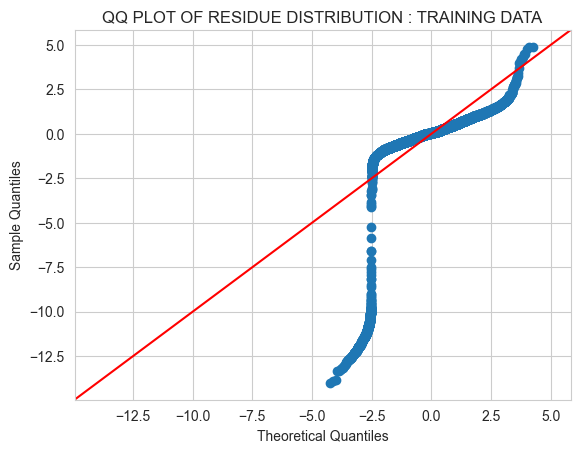

In [111]:
sm.qqplot(x, line = '45', fit= True, dist = stats.norm);
plt.title('QQ PLOT OF RESIDUE DISTRIBUTION : TRAINING DATA')

Text(0, 0.5, 'Residue')

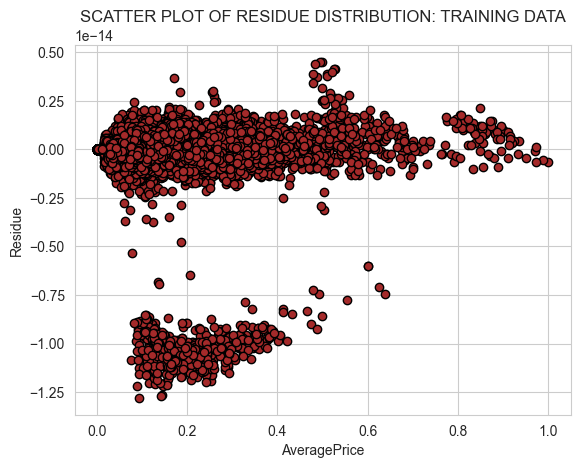

In [112]:
plt.scatter(Y_train, x, color = 'brown',edgecolors = 'black')
plt.title('SCATTER PLOT OF RESIDUE DISTRIBUTION: TRAINING DATA')
plt.xlabel('AveragePrice')
plt.ylabel('Residue')

In [113]:
# TESTING DATASET EVALUATION

C:\Users\ramri\AppData\Local\Temp\ipykernel_10532\1880485754.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


Text(0.5, 0, 'RESIDUE')

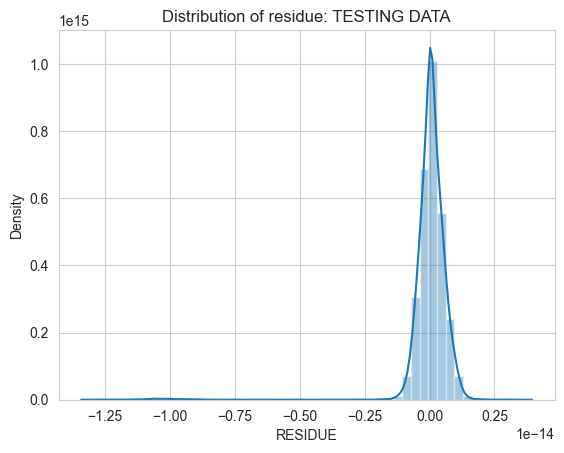

In [114]:
x = Y_test - Y_test_predicted

sns.distplot(x)
plt.title('Distribution of residue: TESTING DATA')
plt.xlabel('RESIDUE')

Text(0.5, 1.0, 'QQ PLOT OF RESIDUE DISTRIBUTION : TESTING DATA')

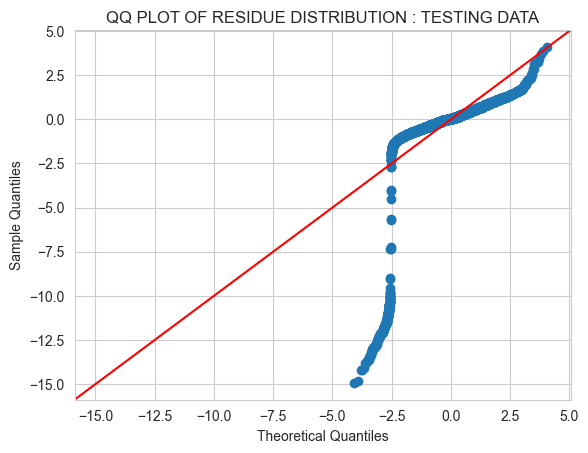

In [136]:
sm.qqplot(x, line = '45', fit= True, dist = stats.norm);
plt.title('QQ PLOT OF RESIDUE DISTRIBUTION : TESTING DATA')

Text(0, 0.5, 'Residue')

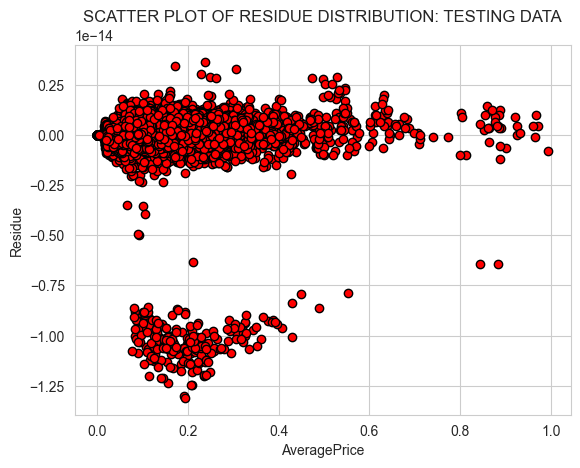

In [137]:
plt.scatter(Y_test, x, color = 'red',edgecolors = 'black')
plt.title('SCATTER PLOT OF RESIDUE DISTRIBUTION: TESTING DATA')
plt.xlabel('AveragePrice')
plt.ylabel('Residue')

In [117]:
# R-SQUARED VALUES
print('R-SQUARED FOR TRAINING DATASET:', r2_score(Y_train, Y_train_predicted))
print('R-SQUARED FOR TESTING DATASET:', r2_score(Y_test, Y_test_predicted))

R-SQUARED FOR TRAINING DATASET: 1.0
R-SQUARED FOR TESTING DATASET: 1.0


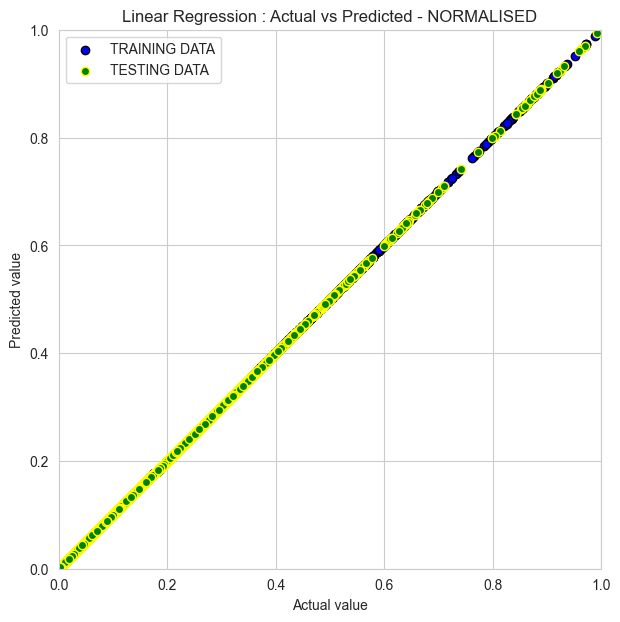

In [145]:
plt.figure(figsize = (7,7))
plt.scatter(Y_train, Y_train_predicted, label = 'TRAINING DATA',color = 'blue', edgecolors = 'black')
plt.scatter(Y_test, Y_test_predicted, label = 'TESTING DATA', color = 'green',edgecolors = 'yellow')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Linear Regression : Actual vs Predicted - NORMALISED')
plt.legend()

In [119]:
#2.RIDGE
r = Ridge(alpha = 0.001)
r.fit(X_train, Y_train)

Y_train_predicted = r.predict(X_train)
print(r2_score(Y_train,Y_train_predicted))

Y_test_predicted = r.predict(X_test)
print(r2_score(Y_test, Y_test_predicted))    

0.9999999999952786
0.9999999999952748


In [120]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()
model_cv = GridSearchCV(estimator = model, param_grid= hyper_param,
                       cv = folds, scoring = 'neg_mean_absolute_error',
                       verbose = 1, return_train_score = True)
model_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [121]:
cv_res = pd.DataFrame(model_cv.cv_results_)
cv_res['param_alpha'] = cv_res['param_alpha'].astype('float32')
cv_res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.082653      0.070700         0.003843        0.003773       0.0001   
1       0.056597      0.018250         0.002536        0.003182       0.0010   
2       0.041695      0.007833         0.003220        0.005274       0.0100   
3       0.039363      0.007135         0.002083        0.002849       0.0500   
4       0.034320      0.005142         0.009751        0.007964       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -1.242720e-08      -1.236612e-08      -1.215712e-08   
1   {'alpha': 0.001}      -1.242704e-07      -1.236597e-07      -1.215705e-07   
2    {'alpha': 0.01}      -1.242553e-06      -1.236448e-06      -1.215644e-06   
3    {'alpha': 0.05}      -6.210253e-06      -6.179727e-06      -6.077143e-06   
4     {'alpha': 0.1}      -1.241630e-05      -1.235513e-05      -1.215215e-05   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0      -1.251796e-08  ...       -1.228312e-08       -1.241421e-08   
1      -1.251774e-07  ...       -1.228301e-07       -1.241405e-07   
2      -1.251569e-06  ...       -1.228194e-06       -1.241253e-06   
3      -6.254522e-06  ...       -6.139150e-06       -6.203781e-06   
4      -1.250377e-05  ...       -1.227502e-05       -1.240340e-05   

   split4_train_score  split5_train_score  split6_train_score  \
0       -1.231259e-08       -1.226485e-08       -1.236472e-08   
1       -1.231245e-07       -1.226472e-07       -1.236459e-07   
2       -1.231121e-06       -1.226354e-06       -1.236331e-06   
3       -6.153559e-06       -6.129797e-06       -6.179576e-06   
4       -1.230357e-05       -1.225617e-05       -1.235553e-05   

   split7_train_score  split8_train_score  split9_train_score  \
0       -1.236465e-08       -1.236270e-08       -1.233283e-08   
1       -1.236451e-07       -1.236257e-07       -1.233270e-07   
2       -1.236321e-06       -1.236137e-06       -1.233152e-06   
3       -6.179443e-06       -6.178668e-06       -6.163778e-06   
4       -1.235520e-05       -1.235380e-05       -1.232406e-05   

   mean_train_score  std_train_score  
0     -1.233314e-08     4.378706e-11  
1     -1.233300e-07     4.377852e-10  
2     -1.233170e-06     4.370332e-09  
3     -6.163693e-06     2.174098e-08  
4     -1.232368e-05     4.332355e-08  

[5 rows x 31 columns]

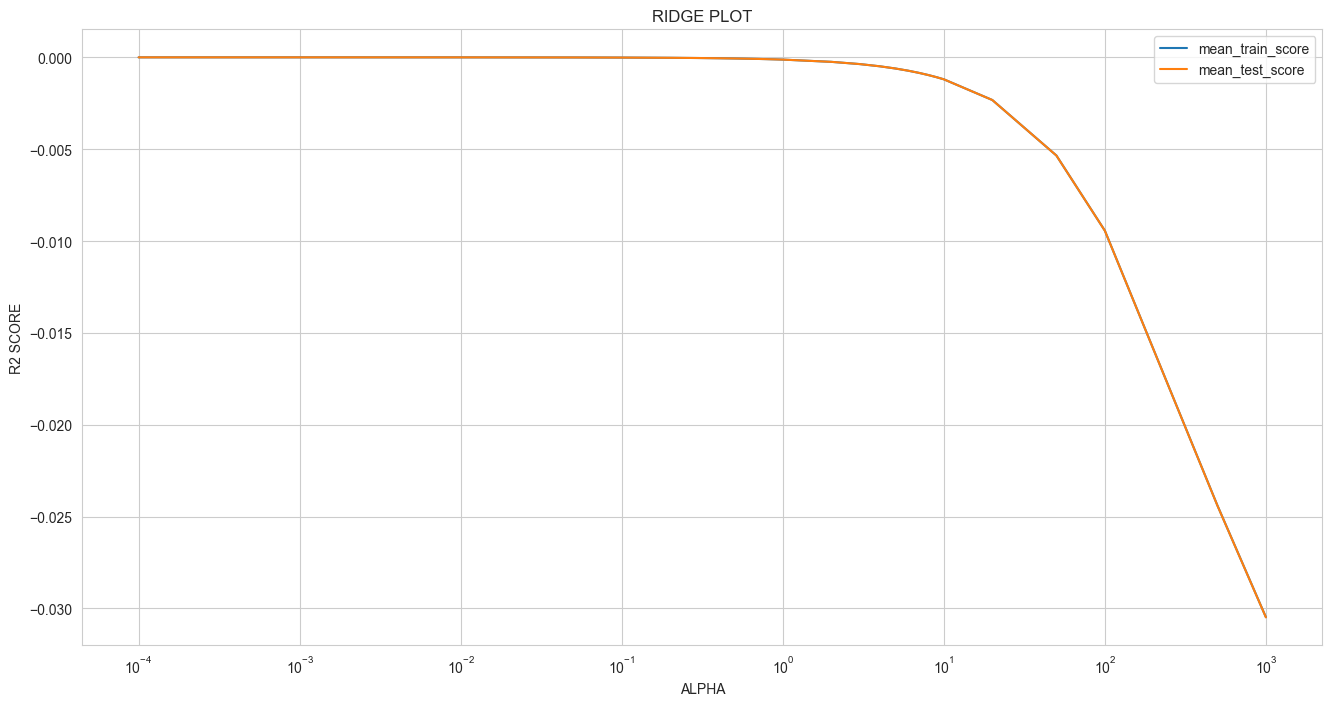

In [122]:
plt.figure(figsize=(16,8))
plt.plot(cv_res['param_alpha'], cv_res['mean_train_score'], label = 'mean_train_score')
plt.plot(cv_res['param_alpha'], cv_res['mean_test_score'], label = 'mean_test_score')
plt.xlabel('ALPHA')
plt.xscale('log')
plt.ylabel('R2 SCORE')
plt.title('RIDGE PLOT')
plt.legend()
plt.show()

In [123]:
# CHECKING THE BEST ALPHA VALUE
model_cv.best_params_

{'alpha': 0.0001}

In [124]:
r = Ridge(alpha = 0.001)
r.fit(X_train, Y_train)

Y_train_predicted = r.predict(X_train)
print(r2_score(Y_train,Y_train_predicted))

Y_test_predicted = r.predict(X_test)
print(r2_score(Y_test, Y_test_predicted)) 

0.9999999999952786
0.9999999999952748


In [125]:
model_param = list(r.coef_)
model_param.append(r.intercept_)
c = list(X_train.columns)
c.append('constants')
ridge_coef = pd.DataFrame(list(zip(c, model_param)))
ridge_coef.columns = ['FEATURE', 'COEFFICIENT']

In [139]:
ridge_coef.sort_values(by = 'COEFFICIENT', ascending = False).head(20)

FEATURE  COEFFICIENT
0             AveragePrice     0.994554
24               constants     0.000532
16                FOOIndex     0.000308
22            Old1m%Change     0.000071
19            New1m%Change     0.000030
8       Terraced12m%Change     0.000018
3       Detached12m%Change     0.000016
9                FlatIndex     0.000012
10          Flat12m%Change     0.000011
13          Cash12m%Change     0.000009
17           FOO12m%Change     0.000005
21                OldIndex     0.000004
7        Terraced1m%Change     0.000003
18                NewIndex    -0.000001
5   SemiDetached12m%Change    -0.000010
20           New12m%Change    -0.000011
6            TerracedIndex    -0.000012
11               CashIndex    -0.000014
4    SemiDetached1m%Change    -0.000021
23           Old12m%Change    -0.000026

In [127]:
# RESIDUE ANALYSIS
#1. TRAINING DATASET EVALUATION
r = Y_train - Y_train_predicted

C:\Users\ramri\AppData\Local\Temp\ipykernel_10532\549796944.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(r)


Text(0.5, 0, 'RESIDUE')

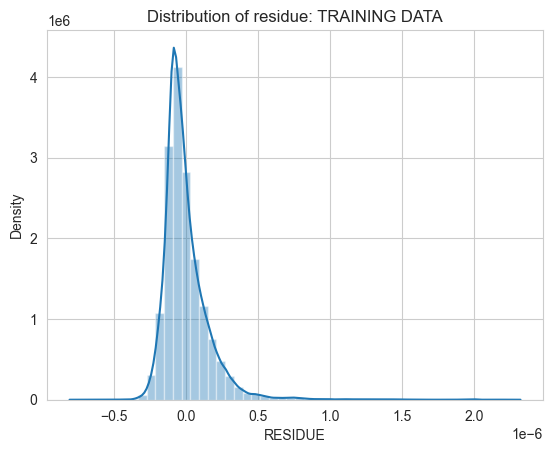

In [128]:
sns.distplot(r)
plt.title('Distribution of residue: TRAINING DATA')
plt.xlabel('RESIDUE')

Text(0.5, 1.0, 'QQ PLOT OF RESIDUE DISTRIBUTION : TRAINING DATA')

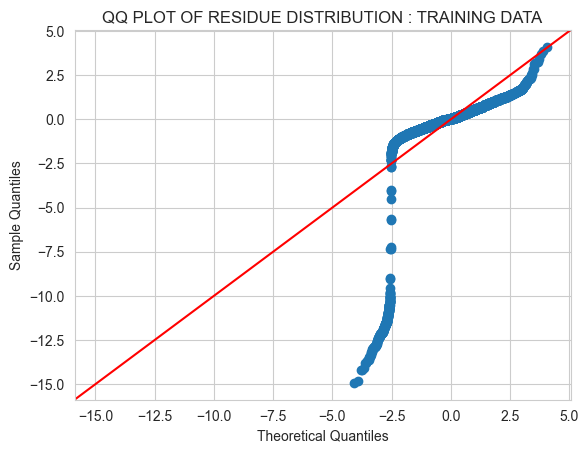

In [129]:
sm.qqplot(x, line = '45', fit= True, dist = stats.norm)
plt.title('QQ PLOT OF RESIDUE DISTRIBUTION : TRAINING DATA')

Text(0, 0.5, 'Residue')

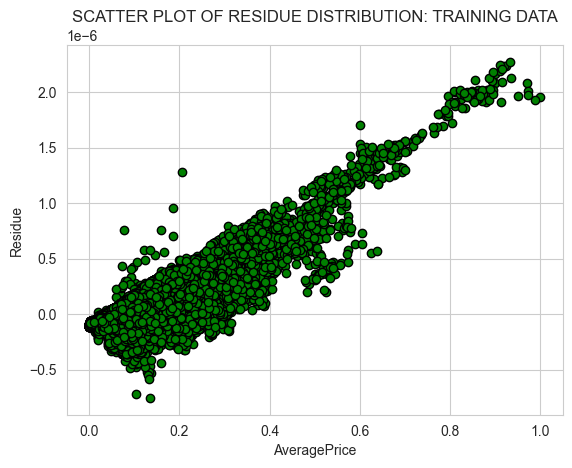

In [130]:
plt.scatter(Y_train, r, color = 'green', edgecolors = 'black')
plt.title('SCATTER PLOT OF RESIDUE DISTRIBUTION: TRAINING DATA')
plt.xlabel('AveragePrice')
plt.ylabel('Residue')

In [131]:
# R-SQUARED VALUES
print('R-SQUARED FOR TRAINING DATASET:', r2_score(Y_train, Y_train_predicted))
print('R-SQUARED FOR TESTING DATASET:', r2_score(Y_test, Y_test_predicted))

R-SQUARED FOR TRAINING DATASET: 0.9999999999952786
R-SQUARED FOR TESTING DATASET: 0.9999999999952748


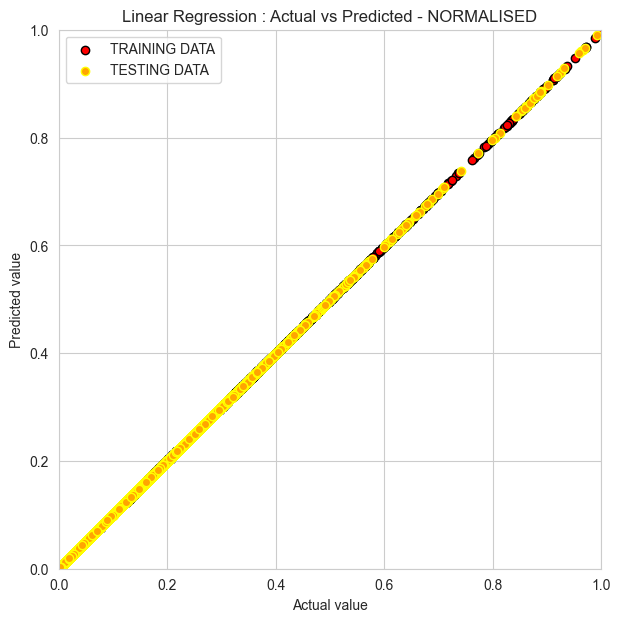

In [141]:
plt.figure(figsize = (7,7))
plt.scatter(Y_train, Y_train_predicted, label = 'TRAINING DATA',color = 'red', edgecolors = 'black')
plt.scatter(Y_test, Y_test_predicted, label = 'TESTING DATA', color = 'orange',edgecolors = 'yellow')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Linear Regression : Actual vs Predicted - NORMALISED')
plt.legend()

In [133]:
# FINAL MODEL
r = Ridge(alpha = 2)
r.fit(X_train, Y_train)

Y_train_predicted = r.predict(X_train)
print(r2_score(Y_train, Y_train_predicted))

Y_test_predicted = r.predict(X_test)
print(r2_score(Y_test, Y_test_predicted))

0.9999813322790703
0.9999813257690862


In [134]:
model_param = list(r.coef_)
model_param.append(r.intercept_)
c = list(X_train.columns)
c.append('constants')
ridge_coef = pd.DataFrame(list(zip(c, model_param)))
ridge_coef.columns = ['FEATURE', 'COEFFICIENT']

In [142]:
ridge_coef.sort_values(by = 'COEFFICIENT', ascending = False).head(30)

FEATURE  COEFFICIENT
0             AveragePrice     0.994554
24               constants     0.000532
16                FOOIndex     0.000308
22            Old1m%Change     0.000071
19            New1m%Change     0.000030
8       Terraced12m%Change     0.000018
3       Detached12m%Change     0.000016
9                FlatIndex     0.000012
10          Flat12m%Change     0.000011
13          Cash12m%Change     0.000009
17           FOO12m%Change     0.000005
21                OldIndex     0.000004
7        Terraced1m%Change     0.000003
18                NewIndex    -0.000001
5   SemiDetached12m%Change    -0.000010
20           New12m%Change    -0.000011
6            TerracedIndex    -0.000012
11               CashIndex    -0.000014
4    SemiDetached1m%Change    -0.000021
23           Old12m%Change    -0.000026
12           Cash1m%Change    -0.000089
2        Detached1m%Change    -0.000206
1                1m%Change    -0.000219
14           MortgageIndex    -0.000292
15      Mortgage12m%Change    -0.000445

In [143]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_train_predicted = lm.predict(X_train)
print(r2_score(y_true = Y_train, y_pred = Y_train_predicted))

Y_test_predicted = lm.predict(X_test)
print(r2_score(y_true = Y_test, y_pred = Y_test_predicted))

1.0
1.0


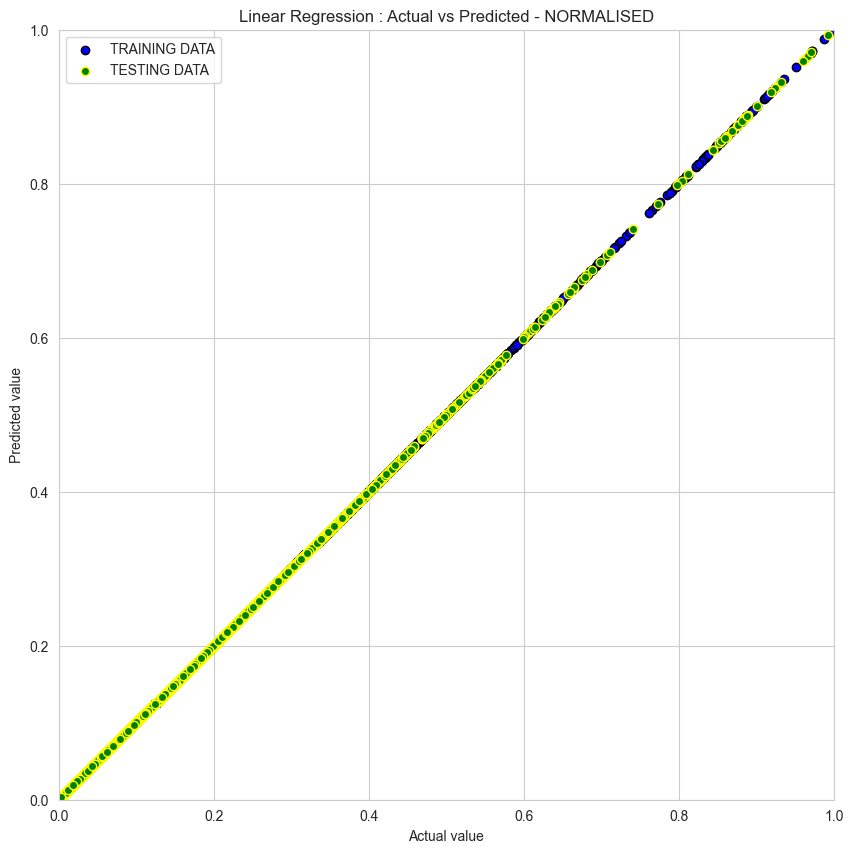

In [144]:
plt.figure(figsize = (10,10))
plt.scatter(Y_train, Y_train_predicted, label = 'TRAINING DATA',color = 'blue', edgecolors = 'black')
plt.scatter(Y_test, Y_test_predicted, label = 'TESTING DATA', color = 'green',edgecolors = 'yellow')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Linear Regression : Actual vs Predicted - NORMALISED')
plt.legend()